# DC Fire Engine Analysis

In [1]:
import geopandas as geo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import arviz as az
import pytensor
pytensor.config.cxx=''
pytensor.config.floatX = "float32"
import pytensor.tensor as pt
import pymc as pm
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True #helps make arviz plots more readable

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Importing DC GIS Files

In [2]:
dc_shape = geo.read_file(r'C:\Users\gargo\OneDrive\FD Data\Washington_DC_Boundary\Washington_DC_Boundary.shp')

In [3]:
dc_shape.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
dc_shape.to_crs('+proj=leac', inplace=True)

In [84]:
dc_shape.crs

<Projected CRS: +proj=leac +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ leac
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
dc_alarm_districts = geo.read_file(r'C:\Users\gargo\OneDrive\FD Data\Fire_Alarm_Districts\Fire_Alarm_Districts.shp')

In [7]:
dc_alarm_districts.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
dc_alarm_districts.to_crs('+proj=leac', inplace=True)

In [9]:
dc_alarm_districts.crs

<Projected CRS: +proj=leac +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ leac
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
dc_alarm_districts['area_of_alarm_district_in_miles'] = dc_alarm_districts.geometry.area/ 2.589988e6

In [11]:
dc_engine_companies = geo.read_file(r'C:\Users\gargo\OneDrive\FD Data\Fire_Stations\Fire_Stations.shp')
dc_engine_companies = dc_engine_companies[dc_engine_companies['TYPE'].str.startswith('Engine House')]

In [12]:
dc_engine_companies.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
dc_engine_companies.to_crs('+proj=leac', inplace=True)

In [14]:
dc_engine_companies.crs

<Projected CRS: +proj=leac +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ leac
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
dc_alarm_districts.head()

,NAME,DATE_EST,ENGINE_ID,BATTALION,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SHAPEAREA,SHAPELEN,geometry,area_of_alarm_district_in_miles
0,ENGINE COMPANY 22 LOCAL ALARM DISTRICT,2017-08-22,E-22,0,FireAlarmDistrictPly_7,{4376F8FE-4DF9-4923-9F63-4266C4D49F6F},None,None,None,None,1,0,0,"POLYGON ((-4847437.473 6653339.843, -4847571.0...",3.512508
1,ENGINE COMPANY 31 LOCAL ALARM DISTRICT,2001-09-18,E-31,5,FireAlarmDistrictPly_25,{8F3D04F2-D304-4EF2-A551-191507B9A4BF},None,None,None,None,2,0,0,"POLYGON ((-4850632.101 6653460.257, -4850669.6...",3.730507
2,ENGINE COMPANY 14 LOCAL ALARM DISTRICT,2017-08-22,E-14,0,FireAlarmDistrictPly_8,{EBFF6DD1-78A4-43C8-8CBA-CE16209DE0D2},None,None,None,None,3,0,0,"POLYGON ((-4847268.878 6653210.769, -4847274.4...",2.382726
3,ENGINE COMPANY 24 LOCAL ALARM DISTRICT,2017-08-22,E-24,0,FireAlarmDistrictPly_28,{D7FE4D8C-5AAE-4657-9A84-B78D215C77F5},None,None,None,None,4,0,0,"POLYGON ((-4849491.07 6654155.715, -4849485.79...",2.159556
4,ENGINE COMPANY 20 LOCAL ALARM DISTRICT,2001-09-12,E-20,5,FireAlarmDistrictPly_23,{7632282F-5EEE-4F94-9BC6-5CA89C2BE314},None,None,None,None,5,0,0,"POLYGON ((-4852582.203 6655008.277, -4852585.8...",3.053830


In [16]:
dc_engine_companies['ENGINE_ID'] = 'E-' + dc_engine_companies['TYPE'].str.extract(r'(\d+)$')

distance_table = dc_alarm_districts[['ENGINE_ID','geometry']].rename(columns={'geometry': 'geometry_dist'}).merge(
    dc_engine_companies[['ENGINE_ID','geometry']], 
    how='left', on='ENGINE_ID'
)

distance_table['hausdorff_dist_in_miles'] = distance_table.geometry.hausdorff_distance(distance_table.geometry_dist)/ 1.609344e3

In [17]:
distance_table

,ENGINE_ID,geometry_dist,geometry,hausdorff_dist_in_miles
0,E-22,"POLYGON ((-4847437.473 6653339.843, -4847571.0...",POINT (-4847902.403 6654811.212),2.068802
1,E-31,"POLYGON ((-4850632.101 6653460.257, -4850669.6...",POINT (-4851896.566 6654526.721),3.146183
2,E-14,"POLYGON ((-4847268.878 6653210.769, -4847274.4...",POINT (-4849097.362 6651318.348),1.639264
3,E-24,"POLYGON ((-4849491.07 6654155.715, -4849485.79...",POINT (-4849813.754 6652477.278),1.219755
4,E-20,"POLYGON ((-4852582.203 6655008.277, -4852585.8...",POINT (-4853167.449 6653863.313),1.774778
5,E-17,"POLYGON ((-4847568.419 6650751.45, -4847651.77...",POINT (-4849581.13 6648709.539),1.931417
6,E-28,"POLYGON ((-4852298.984 6653488.721, -4851864.7...",POINT (-4852919.197 6652101.865),1.078968
7,E-11,"POLYGON ((-4851248.231 6652218.322, -4851272.0...",POINT (-4851881.221 6650530.713),1.201331
8,E-29,"POLYGON ((-4856820.864 6649261.827, -4857076.9...",POINT (-4856568.132 6651253.092),2.296967
9,E-26,"POLYGON ((-4847920.73 6647892.698, -4847922.84...",POINT (-4850078.527 6647741.349),1.972161


In [18]:
dc_square_boundaries = geo.read_file(r'C:\Users\gargo\OneDrive\FD Data\Square_Boundaries\Square_Boundaries.shp')
dc_square_boundaries = dc_square_boundaries[dc_square_boundaries['KILL_DT'].isna()] #Loads filters for boundaries that are no longer in use

c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: Geometry of polygon of fid 3444 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(


In [19]:
dc_square_boundaries.head()

,CREATION_D,RECORDATIO,NARRATIVE,EXPIRATION,STATUS,SQUARE,SUFFIX,COMPUTED_A,SURVEYED_A,SQUAREPLYI,FIT_ROTATI,FIT_ROTA_1,FIT_ROTA_2,SW_CORNER_,SW_CORNE_1,KILL_DT,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,2006-09-09,None,PHASE 1,None,1,0519,None,52585.0,None,None,NaN,NaN,NaN,NaN,NaN,NaT,1168401,0,0,"POLYGON ((-8573379.337 4709180.609, -8573385.7..."
1,2006-09-09,None,DELIVERY 11,None,1,3540,None,56856.0,None,None,NaN,NaN,NaN,NaN,NaN,NaT,1168402,0,0,"POLYGON ((-8572008.612 4710356.596, -8572008.6..."
2,2006-09-09,None,DELIVERY 12,None,1,5692,None,255796.0,None,None,NaN,NaN,NaN,NaN,NaN,NaT,1168403,0,0,"POLYGON ((-8566796.783 4701263.175, -8566801.5..."
3,2010-03-08,None,DELIVERY 6,None,1,2943,None,38363.0,None,None,NaN,NaN,NaN,NaN,NaN,NaT,1168404,0,0,"POLYGON ((-8574690.312 4716840.577, -8574757.2..."
4,2010-03-08,None,DELIVERY 8,None,1,3239,None,14815.0,None,None,NaN,NaN,NaN,NaN,NaN,NaT,1168405,0,0,"POLYGON ((-8573516.542 4713145.957, -8573515.7..."


In [28]:
dc_square_boundaries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
dc_square_boundaries.to_crs('+proj=leac', inplace=True)

In [30]:
dc_square_boundaries.crs

<Projected CRS: +proj=leac +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ leac
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Inital Plotting

<Axes: >

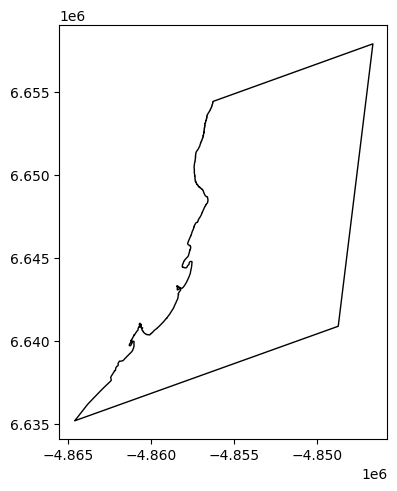

In [23]:
dc_shape.plot(color='white', edgecolor='black')

<Axes: >

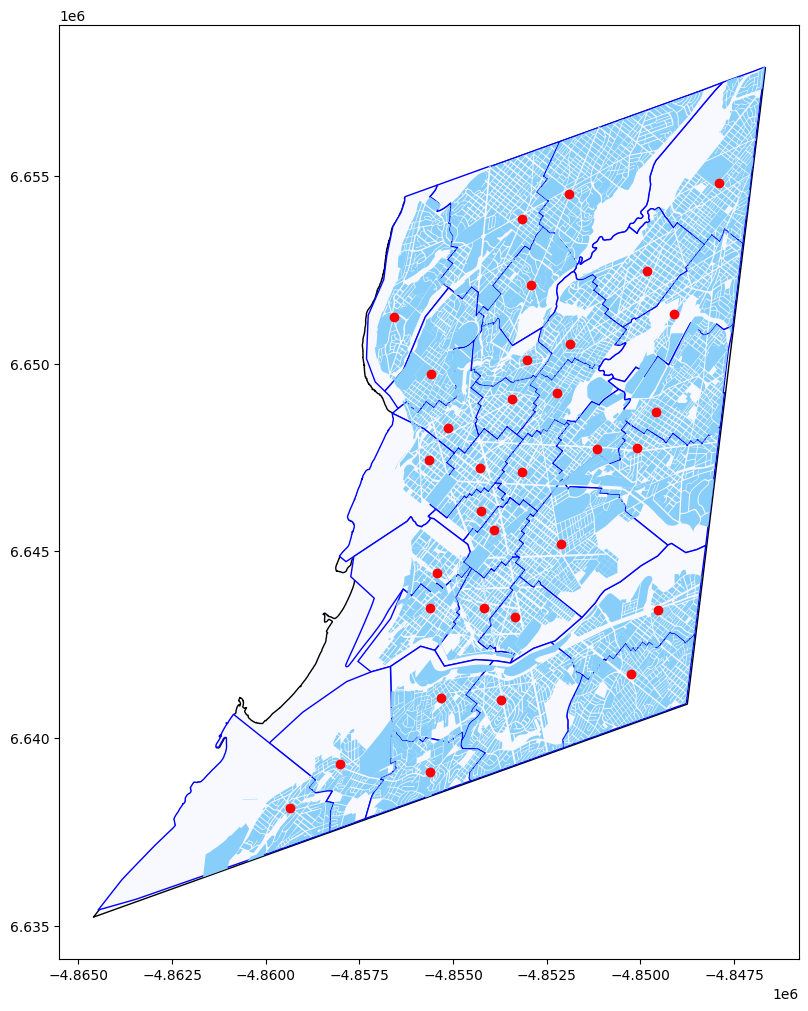

In [31]:
fig,ax = plt.subplots(figsize=(10,10))
dc_engine_companies.plot(ax=ax, color='red', zorder=4)
dc_square_boundaries.plot(ax=ax,color='lightskyblue', zorder=3)
dc_alarm_districts.plot(ax=ax,color='ghostwhite', edgecolor='blue', zorder=2)
dc_shape.plot(ax=ax, edgecolor='black', color='ghostwhite', zorder=1)

### Importing US Census GIS Results

In [39]:
df = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r']) 
df1 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults (1)', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r'])
df2 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults (2)', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r'])
df3 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults (3)', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r'])
df4 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults (4)', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r'])
df5 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\combined data.xlsx' ,sheet_name='GeocodeResults (5)', header=None, 
                   names=['id','address','match_id','match_type','address_match','x', 'y','tigerline_id','l_or_r'])

fires = pd.concat([df,df1, df2, df3, df4, df5], ignore_index=True)

In [40]:
fires.shape

(50956, 9)

In [41]:
fires[fires['match_id']!='Match'].shape

(7924, 9)

In [42]:
fires[fires['match_id']!='Match'].shape[0]/fires.shape[0]

0.15550671167281577

In [43]:
fires_matched = fires[fires['match_id']=='Match'].copy(deep=True)

In [44]:
fires_matched.head()

,id,address,match_id,match_type,address_match,x,y,tigerline_id,l_or_r
0,36121_2023,"1700 EAST CAPITOL ST NE, WASHINGTON, DC, 20003",Match,Exact,"1700 E CAPITOL ST NE, WASHINGTON, DC, 20003",-76.980691,38.889860,76230521.0,L
1,156816_2023,"1811 H PL NE, WASHINGTON, DC, 20002",Match,Exact,"1811 H PL NE, WASHINGTON, DC, 20002",-76.977305,38.900815,76231256.0,R
2,16111_2023,"3632 GEORGIA AVE NW, WASHINGTON, DC, 20010",Match,Exact,"3632 GEORGIA AVE NW, WASHINGTON, DC, 20010",-77.024174,38.935041,76224072.0,L
3,161251_2023,"1722 VARNUM ST NW, WASHINGTON, DC, 20011",Match,Exact,"1722 VARNUM ST NW, WASHINGTON, DC, 20011",-77.039406,38.942881,76222383.0,L
4,47461_2023,"1819 24TH ST NE, WASHINGTON, DC, 20002",Match,Exact,"1819 24TH ST NE, WASHINGTON, DC, 20002",-76.972089,38.914608,76229434.0,R


In [45]:
fires_matched['geometry'] = geo.points_from_xy(fires_matched.x, fires_matched.y, crs="EPSG:4269")
fires_matched_geo = geo.GeoDataFrame(data=fires_matched, geometry='geometry')
fires_matched_geo.to_crs('+proj=leac', inplace=True)

#### merge with blocks

In [92]:
dc_square_boundaries_sub =dc_square_boundaries[['SQUARE', 'geometry']]

dc_square_joined = geo.sjoin(left_df=dc_square_boundaries_sub, right_df=fires_matched_geo, how='left')

In [93]:
dc_square_joined[~dc_square_joined['index_right'].isna()].head() #see matches

,SQUARE,geometry,index_right,id,address,match_id,match_type,address_match,x,y,tigerline_id,l_or_r
9,3043,"POLYGON ((-4851205.87 6650069.588, -4851205.23...",39891.0,0111393_2016,"516 PARK RD NW, WASHINGTON, DC, 20010",Match,Exact,"516 PARK RD NW, WASHINGTON, DC, 20010",-77.020787,38.932535,76224140.0,L
25,1443,"MULTIPOLYGON (((-4856327.461 6653180.995, -485...",25626.0,0089172_2017,"5400BLK CATHEDRAL AVE NW, WASHINGTON, DC, 20016",Match,Non_Exact,"5400 CATHEDRAL AVE NW, WASHINGTON, DC, 20016",-77.107675,38.929466,76219121.0,L
25,1443,"MULTIPOLYGON (((-4856327.461 6653180.995, -485...",26099.0,0021168_2017,"5500 SHERIER PL NW, WASHINGTON, DC, 20016",Match,Exact,"5500 SHERIER PL NW, WASHINGTON, DC, 20016",-77.107738,38.929489,76219112.0,L
36,5332,"POLYGON ((-4850341.64 6641238.293, -4850368.63...",47091.0,0193905_2015,"4925 A ST SE, WASHINGTON, DC, 20019",Match,Exact,"4925 A ST SE, WASHINGTON, DC, 20019",-76.931780,38.888180,76233603.0,R
36,5332,"POLYGON ((-4850341.64 6641238.293, -4850368.63...",7290.0,185141_2023,"4907 A ST SE, WASHINGTON, DC, 20019",Match,Exact,"4907 A ST SE, WASHINGTON, DC, 20019",-76.932179,38.888233,76233603.0,R


In [65]:
dc_square_alarm_count = dc_square_joined.groupby(['SQUARE', 'geometry']).agg(num_of_alarms=('index_right','count')).reset_index()

In [97]:
dc_square_alarm_count_gdf = geo.GeoDataFrame(dc_square_alarm_count, geometry='geometry')
dc_square_alarm_count_gdf['num_of_alarms'] = [1 if x>0 else 0 for x in dc_square_alarm_count_gdf.num_of_alarms]

In [95]:
dc_square_alarm_count_gdf.crs

<Projected CRS: +proj=leac +type=crs>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: PROJ leac
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [98]:
dc_square_alarm_count_gdf.head()

,SQUARE,geometry,num_of_alarms
0,0001,"POLYGON ((-4855792.763 6648153.796, -4855802.7...",0
1,0002,"POLYGON ((-4855966.617 6647976.14, -4855996.13...",0
2,0003,"POLYGON ((-4856020.32 6647877.913, -4856037.87...",0
3,0004,"POLYGON ((-4855724.398 6648317.24, -4855712.50...",0
4,0004,"POLYGON ((-4855582.055 6648385.404, -4855560.7...",0


In [123]:
dc_square_alarm_count_gdf['center_point'] = [
    x.centroid if x.geom_type=='Polygon' else x.convex_hull.centroid  for x in dc_square_alarm_count_gdf.geometry]

In [137]:
cp_gdf = geo.GeoSeries(dc_square_alarm_count_gdf.center_point, crs='+proj=leac')

<Axes: >

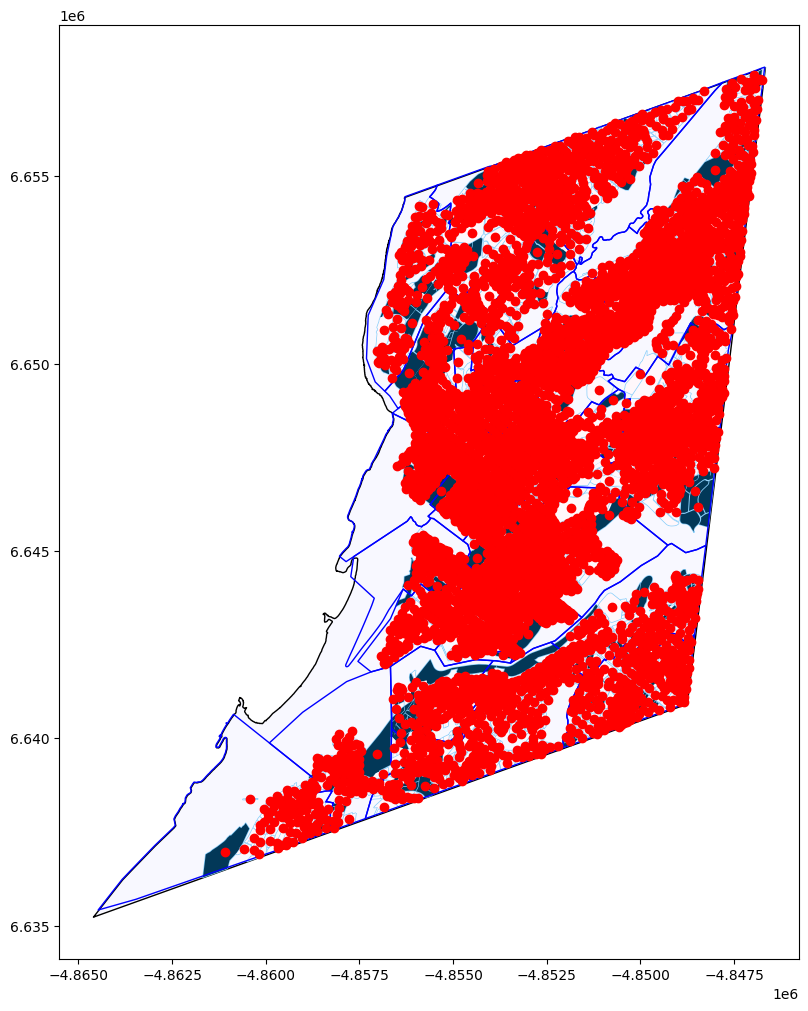

In [138]:
fig,ax = plt.subplots(figsize=(10,10))
cp_gdf.plot(ax=ax, color='red', zorder=5)
dc_square_alarm_count_gdf.plot(ax=ax, column='num_of_alarms', cmap='PuBu', zorder=3)
dc_square_boundaries.plot(ax=ax,edgecolor='lightskyblue',color='lightskyblue', zorder=2)
dc_alarm_districts.plot(ax=ax,color='none', edgecolor='blue', zorder=4)
dc_shape.plot(ax=ax, edgecolor='black', color='ghostwhite', zorder=1)

#### merge with alarms

In [139]:
dc_alarm_merge_df =dc_alarm_districts[['NAME', 'ENGINE_ID', 'geometry']]

fires_joined = geo.sjoin(left_df=fires_matched_geo, right_df=dc_alarm_merge_df, how='left')
#fires_joined.to_file(r'/home/bera/Desktop/crashes_with_wards.gpkg')

In [140]:
fires_joined.head()

,id,address,match_id,match_type,address_match,x,y,tigerline_id,l_or_r,geometry,index_right,NAME,ENGINE_ID
0,36121_2023,"1700 EAST CAPITOL ST NE, WASHINGTON, DC, 20003",Match,Exact,"1700 E CAPITOL ST NE, WASHINGTON, DC, 20003",-76.980691,38.889860,76230521.0,L,POINT (-4852837.908 6643618.581),25.0,ENGINE COMPANY 8 LOCAL ALARM DISTRICT,E-8
1,156816_2023,"1811 H PL NE, WASHINGTON, DC, 20002",Match,Exact,"1811 H PL NE, WASHINGTON, DC, 20002",-76.977305,38.900815,76231256.0,R,POINT (-4851691.094 6644686.841),18.0,ENGINE COMPANY 10 LOCAL ALARM DISTRICT,E-10
2,16111_2023,"3632 GEORGIA AVE NW, WASHINGTON, DC, 20010",Match,Exact,"3632 GEORGIA AVE NW, WASHINGTON, DC, 20010",-77.024174,38.935041,76224072.0,L,POINT (-4851162.553 6650461.676),7.0,ENGINE COMPANY 11 LOCAL ALARM DISTRICT,E-11
3,161251_2023,"1722 VARNUM ST NW, WASHINGTON, DC, 20011",Match,Exact,"1722 VARNUM ST NW, WASHINGTON, DC, 20011",-77.039406,38.942881,76222383.0,L,POINT (-4851279.847 6651975.13),7.0,ENGINE COMPANY 11 LOCAL ALARM DISTRICT,E-11
4,47461_2023,"1819 24TH ST NE, WASHINGTON, DC, 20002",Match,Exact,"1819 24TH ST NE, WASHINGTON, DC, 20002",-76.972089,38.914608,76229434.0,R,POINT (-4850196.59 6645991.59),9.0,ENGINE COMPANY 26 LOCAL ALARM DISTRICT,E-26


In [141]:
fires_joined.to_crs('+proj=webmerc +datum=WGS84',inplace=True)
dc_alarm_districts.to_crs('+proj=webmerc +datum=WGS84',inplace=True)
dc_shape.to_crs('+proj=webmerc +datum=WGS84',inplace=True)

<Axes: >

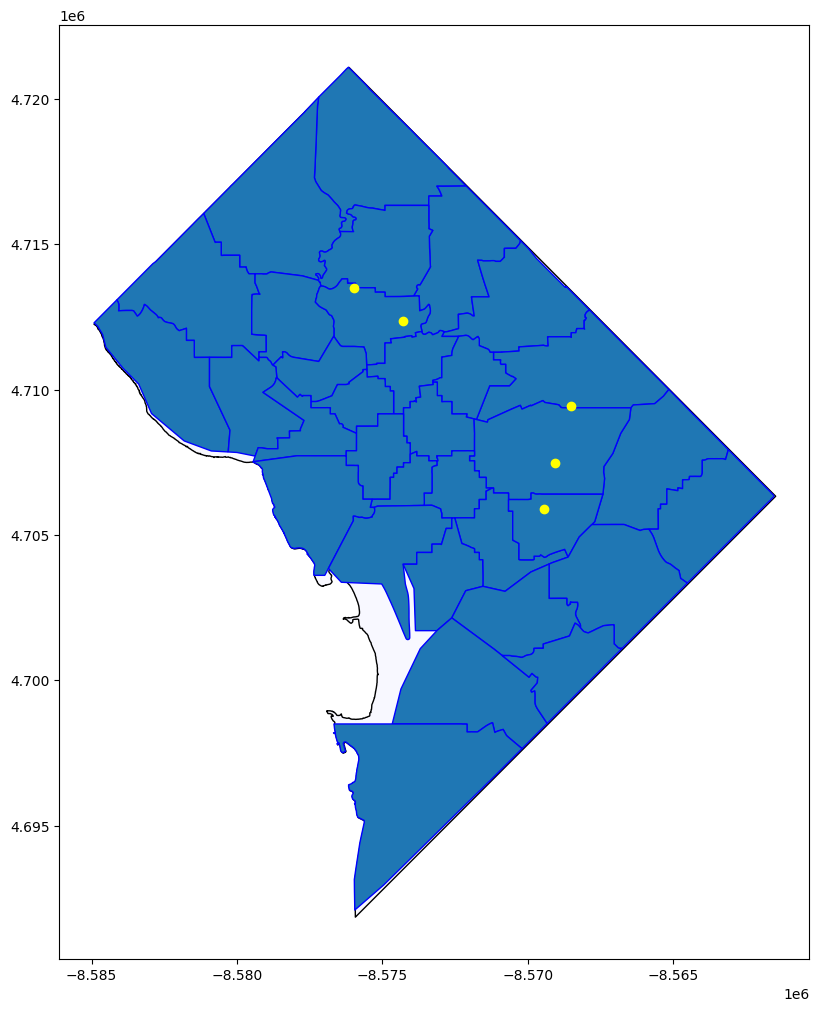

In [142]:
fig,ax = plt.subplots(figsize=(10,10))
fires_joined.head().plot(ax=ax, color='yellow', zorder=3)
dc_alarm_districts.plot(ax=ax, edgecolor='blue', zorder=2)
dc_shape.plot(ax=ax, edgecolor='black', color='ghostwhite', zorder=1)

### Import NFIRS data

In [143]:
df_2023 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2023\Data_2023.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str,'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2022 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2022\Data_2022.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) #skip 2021 as it has no data
df_2020 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2020\Data_2020.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2019 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2019\Data_2019.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2018 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2018\Data_2018.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2017 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2017\Data_2017.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2016 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2016\Data_2016.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2015 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2015\Data_2015.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2014 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2014\Data_2014.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2013 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2013\Data_2013.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 
df_2012 = pd.read_excel(r'C:\Users\gargo\OneDrive\FD Data\2012\Data_2012.xlsx' ,sheet_name='basicincident', dtype={'ALARM': str, 'INC_NO': str, 'INC_DATE': str, 'ARRIVAL': str, 'LU_CLEAR': str}) 

In [144]:
df_2023.dtypes

INCIDENT_KEY     object
STATE            object
FDID              int64
INC_DATE         object
INC_NO           object
EXP_NO            int64
VERSION           int64
DEPT_STA        float64
INC_TYPE          int64
ADD_WILD         object
AID              object
ALARM            object
ARRIVAL          object
INC_CONT        float64
LU_CLEAR         object
SHIFT            object
ALARMS          float64
DISTRICT        float64
ACT_TAK1          int64
ACT_TAK2        float64
ACT_TAK3        float64
APP_MOD          object
SUP_APP           int64
EMS_APP           int64
OTH_APP           int64
SUP_PER           int64
EMS_PER           int64
OTH_PER           int64
RESOU_AID        object
PROP_LOSS       float64
CONT_LOSS       float64
PROP_VAL        float64
CONT_VAL        float64
FF_DEATH          int64
OTH_DEATH       float64
FF_INJ            int64
OTH_INJ         float64
DET_ALERT        object
HAZ_REL          object
MIXED_USE        object
PROP_USE          int64
CENSUS          

In [145]:
df_2023['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2023['ALARM'].str.slice(-4), format='%H%M').astype(str))  
df_2022['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2022['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2020['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2020['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2020['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2019['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2019['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2019['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2018['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2018['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2018['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2017['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2017['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2017['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2016['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2016['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2016['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2015['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2015['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2015['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2014['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2014['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2014['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2013['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2013['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2013['ALARM'].str.slice(-4), format='%H%M').astype(str)) 
df_2012['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2012['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2012['ALARM'].str.slice(-4), format='%H%M').astype(str)) 

C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2859686206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2023['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2859686206.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2022['alarm_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['ALARM'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2859686206.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

In [146]:
df_2023['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2023['ARRIVAL'].str.slice(-4), format='%H%M').astype(str))  
df_2022['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2022['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2020['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2020['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2020['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2019['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2019['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2019['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2018['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2018['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2018['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2017['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2017['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2017['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2016['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2016['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2016['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2015['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2015['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2015['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2014['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2014['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2014['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2013['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2013['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2013['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 
df_2012['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2012['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2012['ARRIVAL'].str.slice(-4), format='%H%M').astype(str)) 

C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\3609649862.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2023['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\3609649862.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2022['arrival_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['ARRIVAL'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\3609649862.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a

In [147]:
df_2023['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2023['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce')  
df_2022['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2022['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2020['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2020['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2020['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2019['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2019['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2019['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2018['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2018['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2018['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2017['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2017['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2017['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2016['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2016['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2016['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2015['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2015['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2015['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2014['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2014['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2014['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2013['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2013['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2013['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 
df_2012['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2012['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+ 
               ' ' + pd.to_datetime(df_2012['LU_CLEAR'].str.slice(-4), format='%H%M').astype(str), errors='coerce') 

C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2981975823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2023['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2023['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2981975823.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2022['last_unit_cleared_datetime'] = pd.to_datetime(pd.to_datetime(df_2022['LU_CLEAR'].str.slice(0,-4), format='%m%d%Y').astype(str)+
C:\Users\gargo\AppData\Local\Temp\ipykernel_13748\2981975823.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expe

#### Merging Engine ID Data

In [148]:
#df_2023[df_2023['last_unit_cleared_datetime'].notna()]['last_unit_cleared_datetime']
(df_2023['last_unit_cleared_datetime'] - df_2023['arrival_datetime']).mean()

Timedelta('0 days 02:42:40.067706800')

In [149]:
f_merge = fires_joined[['id', 'ENGINE_ID','geometry']].copy(deep=True)

In [150]:
f_merge.to_crs('+proj=leac', inplace=True)

In [151]:
df_2012

,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,DEPT_STA,INC_TYPE,ADD_WILD,AID,...,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS,Column42,alarm_datetime,arrival_datetime,last_unit_cleared_datetime
0,DC,11001,01012012,0000041,0,5.0,24,412,N,N,...,NaN,U,NaN,NaN,400,NaN,NaN,2012-01-01 01:07:00-01:00,2012-01-01 01:10:00-01:00,2012-01-01 01:23:00-01:00
1,DC,11001,01012012,0000097,0,5.0,06,111,N,N,...,NaN,2,N,NaN,419,NaN,NaN,2012-01-01 02:13:00-01:00,2012-01-01 02:17:00-01:00,2012-01-01 02:58:00-01:00
2,DC,11001,01012012,0000163,0,5.0,21,151,N,N,...,NaN,U,NaN,NaN,960,NaN,NaN,2012-01-01 04:04:00-01:00,2012-01-01 04:10:00-01:00,2012-01-01 04:41:00-01:00
3,DC,11001,01012012,0000243,0,5.0,12,412,N,N,...,NaN,U,NaN,NaN,419,NaN,NaN,2012-01-01 09:34:00-01:00,2012-01-01 09:36:00-01:00,2012-01-01 09:54:00-01:00
4,DC,11001,01012012,0000251,0,5.0,10,111,N,N,...,NaN,1,NaN,NaN,419,NaN,NaN,2012-01-01 09:59:00-01:00,2012-01-01 10:00:00-01:00,2012-01-01 14:13:00-01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,DC,11001,12312012,0179113,0,5.0,08,460,N,N,...,NaN,U,NaN,NaN,960,NaN,NaN,2012-12-31 18:44:00-01:00,2012-12-31 18:52:00-01:00,2012-12-31 19:02:00-01:00
3732,DC,11001,12312012,0179183,0,5.0,27,412,N,N,...,NaN,U,NaN,NaN,429,NaN,NaN,2012-12-31 21:21:00-01:00,2012-12-31 21:27:00-01:00,2012-12-31 21:37:00-01:00
3733,DC,11001,12312012,0179216,0,5.0,25,400,N,N,...,NaN,U,NaN,NaN,429,NaN,NaN,2012-12-31 22:35:00-01:00,2012-12-31 22:41:00-01:00,2012-12-31 23:00:00-01:00
3734,DC,11001,12312012,0179223,0,5.0,12,114,N,N,...,NaN,1,NaN,NaN,419,NaN,NaN,2012-12-31 23:10:00-01:00,2012-12-31 23:13:00-01:00,2012-12-31 23:32:00-01:00


In [152]:
def ystrip (ycode):
    temp_df = f_merge[f_merge['id'].str.endswith(ycode)].copy(deep=True)
    temp_df['id'] = temp_df['id'].str.slice(0,-5)
    return temp_df

In [153]:
merge_2012 = ystrip('_2012')
merge_2013 = ystrip('_2013')
merge_2014 = ystrip('_2014')
merge_2015 = ystrip('_2015')
merge_2016 = ystrip('_2016')
merge_2017 = ystrip('_2017')
merge_2018 = ystrip('_2018')
merge_2019 = ystrip('_2019')
merge_2020 = ystrip('_2020')
merge_2022 = ystrip('_2022')
merge_2023 = ystrip('_2023')

In [154]:
df_2012 = df_2012.merge(merge_2012, how='left', left_on='INC_NO', right_on='id')
df_2013 = df_2013.merge(merge_2013, how='left', left_on='INC_NO', right_on='id')
df_2014 = df_2014.merge(merge_2014, how='left', left_on='INC_NO', right_on='id')
df_2015 = df_2015.merge(merge_2015, how='left', left_on='INC_NO', right_on='id')
df_2016 = df_2016.merge(merge_2016, how='left', left_on='INC_NO', right_on='id')
df_2017 = df_2017.merge(merge_2017, how='left', left_on='INC_NO', right_on='id')
df_2018 = df_2018.merge(merge_2018, how='left', left_on='INC_NO', right_on='id')
df_2019 = df_2019.merge(merge_2019, how='left', left_on='INC_NO', right_on='id')
df_2020 = df_2020.merge(merge_2020, how='left', left_on='INC_NO', right_on='id')
df_2022 = df_2022.merge(merge_2022, how='left', left_on='INC_NO', right_on='id')
df_2023 = df_2023.merge(merge_2023, how='left', left_on='INC_NO', right_on='id')

In [155]:
#counting how many rows lack an engine attribution
[df_2012['ENGINE_ID'].isna().sum(),df_2013['ENGINE_ID'].isna().sum(),df_2014['ENGINE_ID'].isna().sum(),
 df_2015['ENGINE_ID'].isna().sum(),df_2016['ENGINE_ID'].isna().sum(),df_2017['ENGINE_ID'].isna().sum(),
 df_2018['ENGINE_ID'].isna().sum(),df_2019['ENGINE_ID'].isna().sum(),df_2020['ENGINE_ID'].isna().sum(),
 df_2022['ENGINE_ID'].isna().sum(), df_2023['ENGINE_ID'].isna().sum()]

[579, 388, 420, 557, 716, 887, 863, 1073, 698, 601, 1162]

### Creating Test Data

In [156]:
incident_data = pd.concat([df_2012[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime', 'ENGINE_ID', 'geometry']], 
           df_2013[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime', 'ENGINE_ID','geometry']], 
           df_2014[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2015[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2016[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2017[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2018[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2019[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2020[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
          df_2022[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']],
                           df_2023[['INC_NO','INC_TYPE','arrival_datetime', 'alarm_datetime','last_unit_cleared_datetime',  'ENGINE_ID','geometry']]]
           , ignore_index=True)
incident_data['travel_time'] = (incident_data['arrival_datetime'] - incident_data['alarm_datetime']).dt.total_seconds()/60
incident_data['service_time'] = (incident_data['last_unit_cleared_datetime'] - incident_data['arrival_datetime']).dt.total_seconds()/3600
incident_data['alarm_y_m_d_h'] = incident_data['arrival_datetime'].dt.year.astype(str) + '_' +incident_data['arrival_datetime'].dt.month.astype(str) + '_' + \
incident_data['arrival_datetime'].dt.day.astype(str)+ '_' + incident_data['arrival_datetime'].dt.hour.astype(str)

incident_data = incident_data[incident_data['INC_TYPE'] <121].copy(deep=True) 
#based on categories from NIFIRS 5.0 reference guide and the DC fired department, I am filtering for all incidents involving a structural fire

In [157]:
incident_data.dtypes

INC_NO                                           object
INC_TYPE                                          int64
arrival_datetime              datetime64[ns, UTC-01:00]
alarm_datetime                datetime64[ns, UTC-01:00]
last_unit_cleared_datetime    datetime64[ns, UTC-01:00]
ENGINE_ID                                        object
geometry                                       geometry
travel_time                                     float64
service_time                                    float64
alarm_y_m_d_h                                    object
dtype: object

In [158]:
incident_data[['service_time','travel_time']].describe()

,service_time,travel_time
count,9415.000000,9415.000000
mean,1.844755,3.816888
std,72.777836,2.980646
min,0.000000,0.000000
25%,0.333333,3.000000
50%,0.533333,3.000000
75%,1.216667,4.000000
max,7059.450000,107.000000


Seeing that  large max values appear for both service_time and travel_time (341 days and almost hours respectivly), some investigation for data entry errors is warrented   !!!!FIX THIS!!!!

After some experimentation, the frequency table below for service_time was arrived at to look for more potentila data entry errors. consulting the various bins formed, and then doing a peicmal review, clear data entry errors can be seen on the last unit cleard where month and day entries were flipped. 

In [159]:
pd.cut(incident_data['service_time'], bins=[0,10, 20, 120,240,560,7536]).value_counts()

service_time
(0, 10]        9361
(10, 20]         32
(20, 120]        12
(560, 7536]       1
(120, 240]        0
(240, 560]        0
Name: count, dtype: int64

In [160]:
# Review values above 20 for service_time for data entry errors due to an uninformed assumption about how long service times should be
incident_data[incident_data['service_time'] >20]

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h
913,0058789,100,2012-05-04 16:39:00-01:00,2012-05-04 16:37:00-01:00,2012-05-06 02:58:00-01:00,E-11,POINT (-4852311.247 6649706.181),2.0,34.316667,2012_5_4_16
1405,0086833,111,2012-06-29 05:34:00-01:00,2012-06-29 05:28:00-01:00,2012-07-03 22:06:00-01:00,E-20,POINT (-4854870.845 6653502.801),6.0,112.533333,2012_6_29_5
5037,0075168,111,2013-06-05 18:39:00-01:00,2013-06-05 18:36:00-01:00,2013-06-07 02:18:00-01:00,E-18,POINT (-4854110.396 6643320.201),3.0,31.650000,2013_6_5_18
5038,0075168,111,2013-06-05 18:39:00-01:00,2013-06-05 18:36:00-01:00,2013-06-07 02:18:00-01:00,E-18,POINT (-4854110.396 6643320.201),3.0,31.650000,2013_6_5_18
5039,0075168,111,2013-06-05 18:39:00-01:00,2013-06-05 18:36:00-01:00,2013-06-07 02:18:00-01:00,E-18,POINT (-4854110.396 6643320.201),3.0,31.650000,2013_6_5_18
8452,0168843,113,2014-11-10 00:00:00-01:00,2014-11-10 00:00:00-01:00,2014-11-10 22:45:00-01:00,E-2,POINT (-4853889.782 6646556.008),0.0,22.750000,2014_11_10_0
12574,0200347,111,2015-12-05 02:48:00-01:00,2015-12-05 02:46:00-01:00,2015-12-05 23:07:00-01:00,E-25,POINT (-4858124.211 6639039.685),2.0,20.316667,2015_12_5_2
19790,0103247,111,2017-06-24 02:59:00-01:00,2017-06-24 02:56:00-01:00,2017-06-26 16:56:00-01:00,E-22,POINT (-4849134.688 6653917.026),3.0,61.950000,2017_6_24_2
24769,0076012,111,2018-05-09 15:19:00-01:00,2018-05-09 15:16:00-01:00,2018-05-11 19:56:00-01:00,E-22,POINT (-4847654.373 6653561.278),3.0,52.616667,2018_5_9_15
27287,0164586,111,2018-09-19 15:24:00-01:00,2018-09-19 15:20:00-01:00,2018-09-21 01:14:00-01:00,E-18,POINT (-4854804.726 6643200.09),4.0,33.833333,2018_9_19_15


Only one of these appears to be erroniously entered

In [161]:
#replace erronius last_unit_cleared_datetime value
incident_data.loc[44315,'last_unit_cleared_datetime'] = incident_data.loc[44315,'last_unit_cleared_datetime'].replace(month=1, day = 11)

#replace erronius service_time value
incident_data.loc[44315,'service_time'] = (incident_data.loc[44315,'last_unit_cleared_datetime'] - incident_data.loc[44315,'alarm_datetime']).total_seconds()/3600



In [162]:
pd.cut(incident_data['travel_time'], bins=[0,10, 20, 40,60,120,240,560,680]).value_counts()

travel_time
(0, 10]       9271
(10, 20]        75
(20, 40]        17
(60, 120]        6
(40, 60]         5
(120, 240]       0
(240, 560]       0
(560, 680]       0
Name: count, dtype: int64

In [163]:
# Review large travel times
incident_data[incident_data['travel_time']>120]#assumption that travling more than 2 hours to a fire is suspicous for a area the size of DC

#These appear to be correctly enterd and may just be the outliers of this data set

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h


In [164]:
incident_data[['service_time','travel_time']].describe()

,service_time,travel_time
count,9415.000000,9415.000000
mean,1.095314,3.816888
std,2.240150,2.980646
min,0.000000,0.000000
25%,0.333333,3.000000
50%,0.533333,3.000000
75%,1.216667,4.000000
max,112.533333,107.000000


The below code creates a pivot table of alarms recieved per hour grouped by a calulated code based on year-month-day-hour

In [165]:
alarm_rate_df = incident_data.groupby('alarm_y_m_d_h').size().reset_index()
alarm_rate_df.rename(columns={alarm_rate_df.columns[1]: 'alarms_per_hour'}, inplace=True)
incident_data = incident_data.merge(alarm_rate_df, how='left', on='alarm_y_m_d_h')

In [166]:
alarm_rate_df['alarms_per_hour'].describe()

count    8701.000000
mean        1.082060
std         0.295446
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: alarms_per_hour, dtype: float64

In [167]:
incident_data.head()

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h,alarms_per_hour
0,0000097,111,2012-01-01 02:17:00-01:00,2012-01-01 02:13:00-01:00,2012-01-01 02:58:00-01:00,E-6,POINT (-4853331.65 6647025.254),4.0,0.683333,2012_1_1_2,1
1,0000251,111,2012-01-01 10:00:00-01:00,2012-01-01 09:59:00-01:00,2012-01-01 14:13:00-01:00,E-10,POINT (-4852368.601 6646090.762),1.0,4.216667,2012_1_1_10,1
2,0000865,111,2012-01-02 21:43:00-01:00,2012-01-02 21:36:00-01:00,2012-01-02 22:01:00-01:00,E-33,POINT (-4858708.079 6637449.801),7.0,0.300000,2012_1_2_21,1
3,0001089,111,2012-01-03 12:10:00-01:00,2012-01-03 12:08:00-01:00,2012-01-03 14:02:00-01:00,E-7,POINT (-4856264.407 6643136.566),2.0,1.866667,2012_1_3_12,2
4,0001105,111,2012-01-03 12:34:00-01:00,2012-01-03 12:32:00-01:00,2012-01-03 12:58:00-01:00,E-16,POINT (-4854434.196 6646843.487),2.0,0.400000,2012_1_3_12,2


In [168]:
engine_companies_dict = pd.Series(dc_engine_companies.geometry.values,index=dc_engine_companies.ENGINE_ID).to_dict()
engine_companies_area_dict = pd.Series(dc_alarm_districts.area_of_alarm_district_in_miles.values,index=dc_alarm_districts.ENGINE_ID).to_dict()

In [169]:
incident_data['area_of_alarm_district_in_miles'] = incident_data['ENGINE_ID'].map(engine_companies_area_dict)

In [170]:
def calculate_distance(row):
    point = row['geometry']
    if row['geometry'] is None:
        return np.nan
    elif row['ENGINE_ID'] != row['ENGINE_ID']:
        return np.nan
    else:
        ref_point = engine_companies_dict[row['ENGINE_ID']]
        #return ref_point
        #output = ((ref_point.x-ref_point.x)**2 + (ref_point.y-ref_point.y)**2)**.5/ 1.609344e3
        #return output
        return point.distance(ref_point)/ 1.609344e3 #convert meters to miles

incident_data['dist_from_engine'] = incident_data.apply(calculate_distance, axis=1)#.isna().sum()/len(incident_data)




In [171]:
#removing incidents that occured outside of DC as they could not be attributed to a particular alarm district. 
incident_data = incident_data[~incident_data['ENGINE_ID'].isna()]

In [172]:
incident_data.head()

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h,alarms_per_hour,area_of_alarm_district_in_miles,dist_from_engine
0,0000097,111,2012-01-01 02:17:00-01:00,2012-01-01 02:13:00-01:00,2012-01-01 02:58:00-01:00,E-6,POINT (-4853331.65 6647025.254),4.0,0.683333,2012_1_1_2,1,1.003114,0.122889
1,0000251,111,2012-01-01 10:00:00-01:00,2012-01-01 09:59:00-01:00,2012-01-01 14:13:00-01:00,E-10,POINT (-4852368.601 6646090.762),1.0,4.216667,2012_1_1_10,1,3.247003,0.591293
2,0000865,111,2012-01-02 21:43:00-01:00,2012-01-02 21:36:00-01:00,2012-01-02 22:01:00-01:00,E-33,POINT (-4858708.079 6637449.801),7.0,0.300000,2012_1_2_21,1,4.851773,0.580920
3,0001089,111,2012-01-03 12:10:00-01:00,2012-01-03 12:08:00-01:00,2012-01-03 14:02:00-01:00,E-7,POINT (-4856264.407 6643136.566),2.0,1.866667,2012_1_3_12,2,1.346312,0.464463
4,0001105,111,2012-01-03 12:34:00-01:00,2012-01-03 12:32:00-01:00,2012-01-03 12:58:00-01:00,E-16,POINT (-4854434.196 6646843.487),2.0,0.400000,2012_1_3_12,2,0.983776,0.243507


In [173]:
incident_data['dist_from_engine'].describe()

count    9000.000000
mean        0.516717
std         0.314209
min         0.013809
25%         0.288744
50%         0.453968
75%         0.667111
max         2.539757
Name: dist_from_engine, dtype: float64

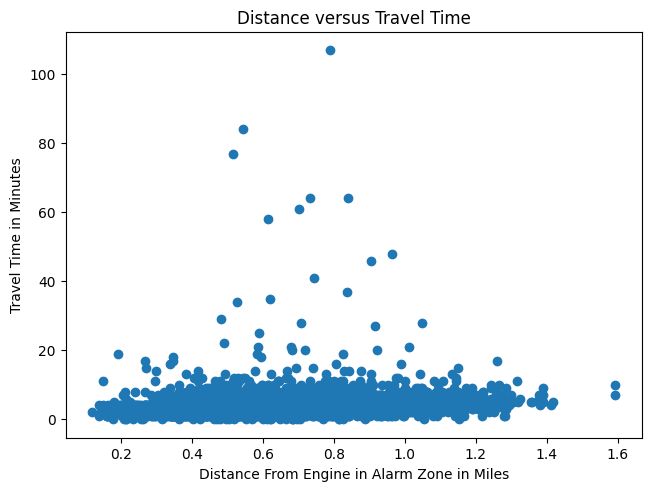

In [174]:
# Create the scatter plot
plt.scatter(np.sqrt(incident_data.dist_from_engine), incident_data.travel_time)

# Add labels and title
plt.xlabel('Distance From Engine in Alarm Zone in Miles')
plt.ylabel('Travel Time in Minutes')
plt.title('Distance versus Travel Time')

# Show the plot
plt.show()

<Axes: xlabel='service_time', ylabel='Count'>

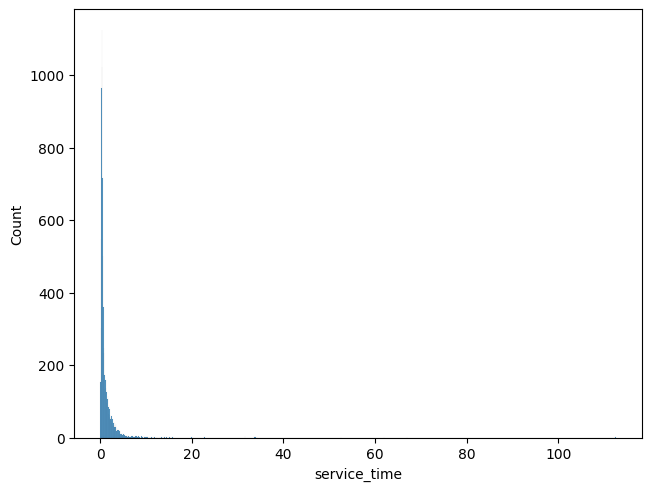

In [63]:
sns.histplot(incident_data.service_time)

In [175]:
incident_data = incident_data.merge(distance_table[['ENGINE_ID','geometry']].rename(columns={'geometry': 'engine_point'}), how='left', on='ENGINE_ID')
incident_data_gdf = geo.GeoDataFrame(incident_data, geometry='geometry', crs='+proj=leac')

In [176]:
incident_data_gdf

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h,alarms_per_hour,area_of_alarm_district_in_miles,dist_from_engine,engine_point
0,0000097,111,2012-01-01 02:17:00-01:00,2012-01-01 02:13:00-01:00,2012-01-01 02:58:00-01:00,E-6,POINT (-4853331.65 6647025.254),4.0,0.683333,2012_1_1_2,1,1.003114,0.122889,POINT (-4853146.173 6647093.893)
1,0000251,111,2012-01-01 10:00:00-01:00,2012-01-01 09:59:00-01:00,2012-01-01 14:13:00-01:00,E-10,POINT (-4852368.601 6646090.762),1.0,4.216667,2012_1_1_10,1,3.247003,0.591293,POINT (-4852121.913 6645171.7)
2,0000865,111,2012-01-02 21:43:00-01:00,2012-01-02 21:36:00-01:00,2012-01-02 22:01:00-01:00,E-33,POINT (-4858708.079 6637449.801),7.0,0.300000,2012_1_2_21,1,4.851773,0.580920,POINT (-4859342.096 6638136.867)
3,0001089,111,2012-01-03 12:10:00-01:00,2012-01-03 12:08:00-01:00,2012-01-03 14:02:00-01:00,E-7,POINT (-4856264.407 6643136.566),2.0,1.866667,2012_1_3_12,2,1.346312,0.464463,POINT (-4855603.555 6643485.856)
4,0001105,111,2012-01-03 12:34:00-01:00,2012-01-03 12:32:00-01:00,2012-01-03 12:58:00-01:00,E-16,POINT (-4854434.196 6646843.487),2.0,0.400000,2012_1_3_12,2,0.983776,0.243507,POINT (-4854274.096 6647201.179)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,196204,111,2023-12-31 06:40:00-01:00,2023-12-31 06:37:00-01:00,2023-12-31 07:19:00-01:00,E-3,POINT (-4853385.687 6644994.089),3.0,0.650000,2023_12_31_6,2,0.832976,0.483755,POINT (-4853917.353 6645562.805)
8996,196355,111,2023-12-31 13:53:00-01:00,2023-12-31 13:50:00-01:00,2023-12-31 14:46:00-01:00,E-31,POINT (-4852118.357 6653900.396),3.0,0.883333,2023_12_31_13,2,3.730507,0.412861,POINT (-4851896.566 6654526.721)
8997,196454,113,2023-12-31 18:06:00-01:00,2023-12-31 18:04:00-01:00,2023-12-31 18:36:00-01:00,E-2,POINT (-4853832.648 6646354.096),2.0,0.500000,2023_12_31_18,2,0.524430,0.323202,POINT (-4854264.67 6646064.432)
8998,196481,111,2023-12-31 19:03:00-01:00,2023-12-31 18:58:00-01:00,2023-12-31 19:40:00-01:00,E-7,POINT (-4855950.853 6643766.789),5.0,0.616667,2023_12_31_19,1,1.346312,0.277565,POINT (-4855603.555 6643485.856)


In [177]:
 #incident_data['geometry'].apply(lambda x: incident_data['engine_point'].distance(x)).unstack() 
#test = geo.GeoDataFrame(incident_data['engine_point']).set_geometry('engine_point')
#incident_data_gdf['geometry'][0].distance(test)/ 1.609344e3
#incident_data['geometry']
#incident_data.head()
#incident_data.head()
#incident_data_gdf.crs
#1/1.609344e3
#((incident_data['geometry'][0].x-incident_data['engine_point'][0].x)**2 + (incident_data['geometry'][0].y-incident_data['engine_point'][0].y)**2)**.5/ 1.609344e3
geo.GeoDataFrame(incident_data_gdf['engine_point']).set_geometry('engine_point')

,engine_point
0,POINT (-4853146.173 6647093.893)
1,POINT (-4852121.913 6645171.7)
2,POINT (-4859342.096 6638136.867)
3,POINT (-4855603.555 6643485.856)
4,POINT (-4854274.096 6647201.179)
...,...
8995,POINT (-4853917.353 6645562.805)
8996,POINT (-4851896.566 6654526.721)
8997,POINT (-4854264.67 6646064.432)
8998,POINT (-4855603.555 6643485.856)


<Axes: >

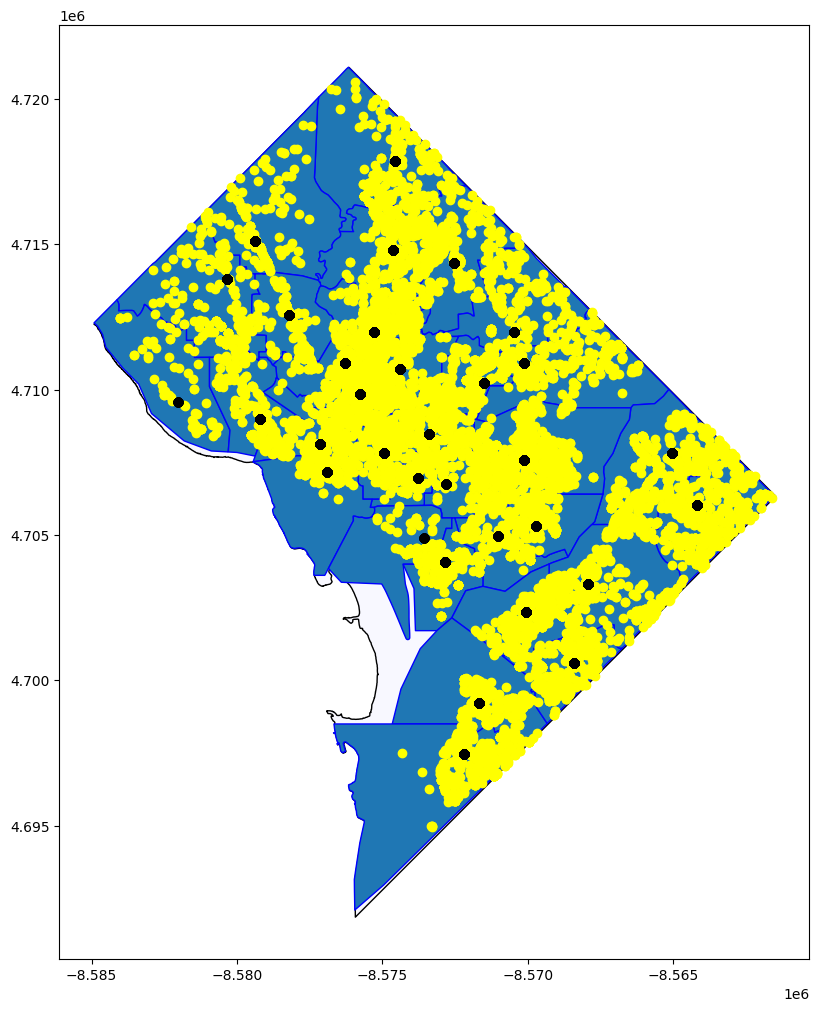

In [178]:
fig,ax = plt.subplots(figsize=(10,10))
geo.GeoDataFrame(incident_data_gdf['engine_point']).set_geometry('engine_point').to_crs('+proj=webmerc +datum=WGS84').plot(ax=ax, color='black', zorder=4)
incident_data_gdf['geometry'].to_crs('+proj=webmerc +datum=WGS84').plot(ax=ax, color='yellow', zorder=3)
dc_alarm_districts.plot(ax=ax, edgecolor='blue', zorder=2)
dc_shape.plot(ax=ax, edgecolor='black', color='ghostwhite', zorder=1)

### Pivot tables and charts from test data

In [181]:
incident_data_gdf.head()

,INC_NO,INC_TYPE,arrival_datetime,alarm_datetime,last_unit_cleared_datetime,ENGINE_ID,geometry,travel_time,service_time,alarm_y_m_d_h,alarms_per_hour,area_of_alarm_district_in_miles,dist_from_engine,engine_point
0,0000097,111,2012-01-01 02:17:00-01:00,2012-01-01 02:13:00-01:00,2012-01-01 02:58:00-01:00,E-6,POINT (-4853331.65 6647025.254),4.0,0.683333,2012_1_1_2,1,1.003114,0.122889,POINT (-4853146.173 6647093.893)
1,0000251,111,2012-01-01 10:00:00-01:00,2012-01-01 09:59:00-01:00,2012-01-01 14:13:00-01:00,E-10,POINT (-4852368.601 6646090.762),1.0,4.216667,2012_1_1_10,1,3.247003,0.591293,POINT (-4852121.913 6645171.7)
2,0000865,111,2012-01-02 21:43:00-01:00,2012-01-02 21:36:00-01:00,2012-01-02 22:01:00-01:00,E-33,POINT (-4858708.079 6637449.801),7.0,0.300000,2012_1_2_21,1,4.851773,0.580920,POINT (-4859342.096 6638136.867)
3,0001089,111,2012-01-03 12:10:00-01:00,2012-01-03 12:08:00-01:00,2012-01-03 14:02:00-01:00,E-7,POINT (-4856264.407 6643136.566),2.0,1.866667,2012_1_3_12,2,1.346312,0.464463,POINT (-4855603.555 6643485.856)
4,0001105,111,2012-01-03 12:34:00-01:00,2012-01-03 12:32:00-01:00,2012-01-03 12:58:00-01:00,E-16,POINT (-4854434.196 6646843.487),2.0,0.400000,2012_1_3_12,2,0.983776,0.243507,POINT (-4854274.096 6647201.179)


In [1]:
alarms_per_hour = incident_data.groupby(
    [
     incident_data.alarm_datetime.dt.year.rename('year'),
     incident_data.alarm_datetime.dt.month.rename('month'),
     incident_data.alarm_datetime.dt.day.rename('day'),
     incident_data.alarm_datetime.dt.hour.rename('hour')
    ]
).size().reset_index()
alarms_per_hour.rename(columns={alarms_per_hour.columns[4]: 'no_of_alarms'}, inplace=True)

NameError: name 'incident_data' is not defined

In [69]:
alarms_per_engine_per_hour = incident_data.groupby(
    ['ENGINE_ID',
     incident_data.alarm_datetime.dt.year.rename('year'),
     incident_data.alarm_datetime.dt.month.rename('month'),
     incident_data.alarm_datetime.dt.day.rename('day'),
     incident_data.alarm_datetime.dt.hour.rename('hour')
    ]
).size().reset_index()
alarms_per_engine_per_hour.rename(columns={alarms_per_engine_per_hour.columns[5]: 'no_of_alarms'}, inplace=True)

In [70]:
alarms_per_engine_per_hour 

,ENGINE_ID,year,month,day,hour,no_of_alarms
0,E-1,2012,1,4,21,1
1,E-1,2012,1,30,1,1
2,E-1,2012,3,1,17,1
3,E-1,2012,5,17,16,1
4,E-1,2012,6,30,7,1
...,...,...,...,...,...,...
8947,E-9,2023,11,6,17,1
8948,E-9,2023,11,10,20,1
8949,E-9,2023,12,2,11,1
8950,E-9,2023,12,2,15,1


In [ ]:
pd.pivot_table(alarms_per_hour, columns = 'year', aggfunc='size', index = 'no_of_alarms').plot(kind='bar', figsize=(10, 10), subplots=True, layout=(6, 2))
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
g = sns.displot(
    incident_data, x=incident_data.travel_time, y ='dist_from_engine' , col=incident_data.alarm_datetime.dt.year.rename('year'), col_wrap=3, kind='kde',
     height=3, facet_kws=dict(margin_titles=True)
)
g.set_xlabels('travel_time')
g.set_ylabels('dist_from_engine')

plt.show()

In [ ]:
g = sns.displot(
    incident_data, x=incident_data.travel_time, y ='dist_from_engine' , col=incident_data.alarm_datetime.dt.year.rename('year'), col_wrap=3, kind='kde',
     height=3, facet_kws=dict(margin_titles=True)
)
g.set_xlabels('travel_time')
g.set_ylabels('dist_from_engine')
plt.xlim(0, 160) 

plt.show()

In [ ]:
f = sns.displot(
    incident_data, x=incident_data.travel_time, y ='dist_from_engine' , col=incident_data.alarm_datetime.dt.year.rename('year'), col_wrap=3, kind='kde', hue = 'ENGINE_ID',
     height=3, facet_kws=dict(margin_titles=True, despine=True)
)
f.set_xlabels('travel_time')
f.set_ylabels('dist_from_engine')

plt.show()

In [ ]:
incident_data.groupby(incident_data.alarm_datetime.dt.year.rename('year'))['travel_time'].agg(['mean', 'median',pd.Series.mode, 'min','max'])


In [ ]:
incident_data.groupby( 'ENGINE_ID')['travel_time'].agg(['mean', 'median',pd.Series.mode, 'min','max'])


In [ ]:
alarms_per_engine_per_hour.groupby('year')

In [ ]:
'''
fig,ax = plt.subplots(figsize=(10,10))
fires_joined[fires_joined['id'].str.endswith('_2012')].plot(ax=ax, color='yellow', zorder=3)
dc_alarm_districts.plot(ax=ax, edgecolor='blue', zorder=2)
dc_shape.plot(ax=ax, edgecolor='black', color='ghostwhite', zorder=1)
'''

In [ ]:
incident_data['dist_from_engine'].describe()

### Model Creation

The following model will be implemented in PyMC:

$$
\begin{align*}
 \\
\alpha &\sim |\mathcal{N}(0, 100)| \\
\beta &\sim |\mathcal{N}(0, 100)| \\
\gamma &\sim  |\mathcal{N}(0, 1)| \\
\theta &\sim \mathcal{\Gamma}(\tau X) \\
\lambda &= \mathcal{Poisson}(\theta) \\
n &= 33 \\
A &= 61.13 \text{ mi}^2 \\
ES &\sim \mathcal{Student}(\nu=3,\nu =1) \text{?}\\
ET &= \alpha + \beta\left(\frac{A}{n-\lambda ES}\right)^\gamma \\
y &\sim \mathcal{normal}(ET, \sigma)
\end{align*}
$$

Gamma is a congugate prior for a Poission distibuttion, thus simplifying calulations

In [ ]:
first_model = pm.Model()

with first_model:
    # Priors for unknown model parameters
    alpha = pm.Deterministic('alpha', pm.HalfNormal('alpha',sigma=100)) #not a lot known about this varibale as it would requier experimental data
    beta = pm.Deterministic('beta', pm.HalfNormal('beta',sigma=100)) #not a lot known about this varibale as it would requier experimental data
    gamma = pm.Deterministic('gamma', pm.HalfNormal('gamma', sigma=1)) # has to be a fractional exponent according to Kolesar [1975]
    theta = pm.Gamma('theta', alpha=1, beta=1)
    lambda_ = pm.Deterministic('lambda_', mu=theta, observed = incident_data['alarms_per_hour'])
    sigma_es = pm.InverseGamma('sigma_es', alpha=1, beta=1)
    ES = pm.HalfNormal('ES',sigma= sigma_es,observed = incident_data['service_time'])
    sigma_y = pm.HalfNormal('sigma_y', sigma=100)
                           
    # Expected value of outcome
    ET = pm.Deterministic('ET',alpha + beta*(61.13/(33-lambda_*ES))**gamma)

    # Sampling distribution of observations
    Y_obs = pm.Normal("Y_obs", mu=ET, sigma=sigma_y, observed=incident_data['travel_time'])

In [ ]:
first_model = pm.Model()

with first_model:
    # Priors for unknown model parameters
    alpha = pm.HalfNormal('alpha',sigma=100) #not a lot known about this varibale as it would requier experimental data
    beta = pm.HalfNormal('beta',sigma=100) #not a lot known about this varibale as it would requier experimental data
    gamma = pm.HalfNormal('gamma',sigma = 1) # has to be a fractional exponent according to Kolesar [1975]
    theta = pm.Gamma('theta', alpha=1, beta=1)
    lambda_ = pm.Poisson('lambda_', mu=theta, observed = incident_data['alarms_per_hour'])
    sigma_es = pm.InverseGamma('sigma_es', alpha=1, beta=1)
    ES = pm.HalfNormal('ES',sigma= sigma_es,observed = incident_data['service_time'])
    sigma_y = pm.HalfNormal('sigma_y', sigma=100)
                           
    # Expected value of outcome
    ET = pm.Deterministic('ET',alpha + beta*(61.13/(33-lambda_*ES))**gamma)
    constraint = ET >= 0
    potential = pm.Potential('ET_constraint', pm.math.log(pm.math.switch(constraint, 1, 0)))
    constraint2 = beta > 0
    potential2 = pm.Potential('beta_constraint', pm.math.log(pm.math.switch(constraint2, 1, 0)))
    constraint3 = gamma > 0
    potential3 = pm.Potential('gamma_constraint', pm.math.log(pm.math.switch(constraint3, 1, 0)))

    # Sampling distribution of observations
    Y_obs = pm.Normal("Y_obs", mu=ET, sigma=sigma_y, observed=incident_data['travel_time'])

In [ ]:
with first_model:
    idata = pm.sample_prior_predictive(draws=50, random_seed=346589)

$\text{The following model will be implemented in PyMC:}$

$$
\begin{align*}
\\
 A &= 61.13 \text{ mi}^2 \\
 n &= 33 \text{engine companies} \\
\alpha &\sim |\mathcal{N}(0, 10)| \\
\beta &\sim |\mathcal{N}(0, 10)| \\
\gamma &\sim  |\mathcal{N}(0, 1)| \\
\lambda &\sim \mathcal{\Gamma}(1,1) \\
alarms_obs\text{obs} &= \mathcal{Poisson}(\lambda) \\
lam_\text{ES} &\sim \mathcal{\Gamma}(3,1) \text{?}\\
mu &\sim  \mathcal{N}(0, 1) \\
alpha_raw &\sim  \mathcal{N}(0, .1) \\
alpha_w &= \exp(alpha_raw) \\
beta_n_w &= \exp(mu/alpha_w) \\
ES &\sim \exp(lam_\text{ES}) \\
ET &= \alpha + \beta\left(\frac{A}{n-\lambda ES}\right)^\gamma \\
y &\sim \mathcal{normal}(ET, \sigma)
\end{align*}
$$

$\text{Gamma is a congugate prior for a Poission distibuttion, thus simplifying calulations}$

In [ ]:
service_time_norm = incident_data['service_time']/incident_data['service_time'].max()
service_time_norm = experiment + (1/3600)

In [ ]:
travel_time_norm = incident_data['travel_time']/incident_data['travel_time'].max()
travel_time_norm = travel_time_norm + (1/60)

In [ ]:
travel_time_norm.describe()

In [ ]:
second_model = pm.Model()



with second_model:
    #constants
    A = pm.Data('A', 61.13) #miles square
    n = pm.Data('n', 33) #number of engine companies
    
    # Priors for unknown model parameters
    α = pm.Uniform('α',0,50) #pm.HalfNormal('α',sigma=100) #not a lot known about this varibale as it would requier experimental data 0
    β = pm.Uniform('β',1,10)  #pm.HalfNormal('β',sigma=100) #not a lot known about this varibale as it would requier experimental data 2.2
    γ = pm.HalfNormal('gamma',sigma = 1) # has to be a fractional exponent according to Kolesar [1975] .3
    λ = pm.Gamma('λ', alpha=1, beta=1)
    alarms_obs = pm.Poisson('alarms_obs', mu= λ, observed = incident_data['alarms_per_hour'])
    #sigma_y = pm.HalfNormal('sigma_y', sigma=100)
    ϕ = pm.HalfNormal('sigma_y', sigma=1) #shape parameter for Wald distribution is likely to be less than 1 given the sharp peak seen in the  travel time data



    #ES
    mu = pm.Normal('mu', mu=0,sigma=1)
    alpha_raw = pm.Normal("alpha_raw", mu=0, sigma=0.1)
    alpha_w = pm.Deterministic("alpha_w", pt.exp(alpha_raw))
    beta_n_w = pm.Deterministic("beta_n_w", pt.exp(mu / alpha_w))
    beta_w = pm.Deterministic("beta_w", (beta_n_w * incident_data['service_time'].max())-(1/3600))
    
    # Sampling distribution of observed service times
    latent = pm.Weibull('latent',alpha=alpha_w, beta=beta_n_w, observed = experiment)

    ES = pm.Deterministic('ES', beta_w*pt.gamma(1 + 1/alpha_w))

    # Expected value of travel_time
    ET = pm.Deterministic('ET',α + β*(A/(n-λ*ES))**γ)

    # Sampling distribution of observed travel times
    travel_time_obs = pm.Wald('travel_time_obs', mu=ET, phi=ϕ, observed=incident_data['travel_time']+ (1/60)) 
    #pm.Normal("Y_obs", mu=ET, sigma=sigma_y, observed=incident_data['travel_time'])
  
    trace2 = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')
az.plot_trace(trace2, var_names=['ES','λ','ET'])

In [ ]:
az.plot_trace(trace2, var_names=['ES','λ','ET', 'α','β'])


In [ ]:
with second_model:
    trace2.extend(pm.sample_prior_predictive(draws=50))
    idata_posterior = pm.sample_posterior_predictive(trace2, var_names=['travel_time_obs', 'latent', 'alarms_obs'],
                                                     return_inferencedata=True,
                                                     extend_inferencedata=True,
                                                     predictions=False)



In [ ]:
idata_posterior

In [ ]:
az.plot_ppc(idata_posterior, data_pairs={'travel_time_obs': 'travel_time_obs'}, num_pp_samples=100)

In [ ]:
incident_data['travel_time'].describe()

In [ ]:
from fitter import Fitter

In [ ]:
f = Fitter(np.log(incident_data['service_time']+1/3600))
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
f.fitted_param['genextreme'] #genextreme.pdf(x, c, loc, scale)

In [ ]:
f.fitted_param['invweibull'] #genextreme.pdf(x, c, loc, scale)

In [ ]:
f = Fitter(incident_data['travel_time']+1/60) #, distributions=['lognorm', 'expon', 'gamma', 'weibull_min', 'weibull_max']
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
f = Fitter(np.log(incident_data['travel_time']+1/60))
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
np.log(incident_data['travel_time']+1/60).describe()


In [ ]:
sns.histplot(np.log(incident_data['travel_time']+1/60))

In [ ]:
sns.histplot(np.log(incident_data['service_time']+1/3600))

In [ ]:
model_data = incident_data[['service_time', 'alarms_per_hour', 'travel_time']].copy(deep=True)

st_max = model_data['service_time'].max()  + (1/3600)
model_data['service_time'] = (model_data['service_time'] + (1/3600))/ st_max

tt_max = model_data['travel_time'].max() + (1/60)
model_data['travel_time'] = (model_data['travel_time'] + (1/60))/ tt_max

In [ ]:
coords = {
    'alarms_per_hour': model_data['alarms_per_hour'],
    'service_time': model_data['service_time'],
    'travel_time': model_data['travel_time']
}

In [ ]:
test_model = pm.Model(coords=coords)

with test_model:

    # Priors for unknown model parameters
    α = pm.HalfNormal('α',sigma=200) #not a lot known about this varibale as it would requier experimental data 0
    β = pm.HalfNormal('β',sigma=1) #not a lot known about this varibale as it would requier experimental data 2.2

    

    # Sampling distribution of observed travel times
   
    travel_time_obs = pm.Weibull('travel_time_obs', alpha=α, beta=β,  observed=incident_data['travel_time']+ (1/60)) 
    ET =pm.Deterministic('tester',β*pt.exp(1+1/α))
    idata_test = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')
  
    

In [ ]:
az.plot_trace(idata_test)

In [ ]:
with test_model:
    idata_test = pm.sample_posterior_predictive(idata_test, var_names=['travel_time_obs'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
az.plot_ppc(idata_test,var_names= ['travel_time_obs'], num_pp_samples=100, alpha=0.03, figsize=(12, 6))

In [ ]:
incident_data['travel_time'].describe()

In [ ]:
sns.histplot(incident_data['travel_time'])

In [ ]:
# Fréchet Distribution
#α is shape
#β is scale
#m is location
(α/β)*(x/β)**-(α-1) *pm.exp(-(x/β)**-α)


In [ ]:
#https://www.pymc.io/projects/examples/en/latest/case_studies/GEV.html
# Optionally centre the data, depending on fitting and divergences
# cdata = (data - data.mean())/data.std()
#(-0.08169165903243036, 2.9288047916457476, 1.336149806198795)

with pm.Model() as third_test_model:
    # Priors
    μ = pm.HalfNormal("μ", sigma=5)  #Location
    σ = pm.HalfNormal("σ", sigma=5)  #shape
    ξ = pm.TruncatedNormal("ξ", mu=0, sigma=.001, lower=0.01, upper=1)
    # Estimation
    gev = pmx.GenExtreme('gev', mu=μ, sigma=σ, xi=ξ, observed=incident_data['travel_time']) #incident_data
    idata_test_2 = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')

In [ ]:
third_model = pm.Model(coords=coords)

with third_model:
    #Intervals 
    interval_alpha = pm.distributions.transforms.Interval(lower=0, upper=10) #need to justify this
    interval_beta = pm.distributions.transforms.Interval(lower=1, upper=3.5) #need to justify this
    interval_gamma = pm.distributions.transforms.Interval(lower=.1, upper=.9) #assuming this to be a fractional exponent, .1 to .9 is a reasonable 
    
    #constants
    A = pm.Data('A', 61.13) #miles square
    n = pm.Data('n', 33) #number of engine companies
    
    # Priors for unknown model parameters
    α = pm.Normal('α', transform =interval_alpha) #pm.Uniform('α',0,50) #pm.HalfNormal('α',sigma=100) #not a lot known about this varibale as it would requier experimental data 0
    β = pm.Normal('β',transform =interval_beta) #pm.Uniform('β',1,10)  #pm.HalfNormal('β',sigma=100) #not a lot known about this varibale as it would requier experimental data 2.2
    γ = pm.Normal('gamma',transform =interval_gamma) # has to be a fractional exponent according to Kolesar [1975] .3
    λ = pm.Gamma('λ', alpha=1, beta=1)
    alarms_obs = pm.Poisson('alarms_obs', mu= λ, observed = model_data['alarms_per_hour'])
    



    #ES
    mu = pm.Normal('mu', mu=0,sigma=1)
    alpha_raw = pm.Normal("alpha_raw", mu=0, sigma=0.1)
    alpha_w = pm.Deterministic("alpha_w", pt.exp(alpha_raw))
    beta_n_w = pm.Deterministic("beta_n_w", pt.exp(mu / alpha_w))
    beta_w = pm.Deterministic("beta_w", (beta_n_w *st_max )- (1/3600))
    
    # Sampling distribution of observed service times
    service_time_obs = pm.Weibull('service_time_obs',alpha=alpha_w, beta=beta_n_w, observed = model_data['service_time'])

    ES = pm.Deterministic('ES', beta_w*pt.gamma(1 + 1/alpha_w))

    # Expected value of travel_time
    ET = pm.Deterministic('ET',α + β*(A/(n-λ*ES))**γ)

    # Sampling distribution of observed travel times
    ϕ = pm.HalfNormal('ϕ', sigma=1) #shape parameter for Wald distribution is likely to be less than 1 given the sharp peak seen in the  travel time data
    travel_time_obs = pm.Wald('travel_time_obs', mu=(ET+(1/60))/tt_max, phi=ϕ, observed=model_data['travel_time']) 
    #pm.Normal("Y_obs", mu=ET, sigma=sigma_y, observed=incident_data['travel_time'])
    #idata = pm.sample_prior_predictive(draws=50)
    idata2 = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')
  
    

In [ ]:
az.plot_trace(idata2)  #var_names=['ES','λ','ET', 'α','β']

In [ ]:
import xarray as xr

In [ ]:
import scipy.stats as st

In [ ]:
idata

In [ ]:
idata.prior_predictive.travel_time_obs

In [ ]:
_, ax = plt.subplots()
idata.prior_predictive.plot.scatter(x='travel_time_obs', y='travel_time_obs_dim_0', color="k", alpha=0.2, ax=ax)
plt.xticks(rotation=45)
plt.title("Prior Check")
ax.set_ylabel("Mean log Eaches Sold");

In [ ]:
az.plot_kde(idata.prior_predictive['travel_time_obs'].values)

In [ ]:
az.plot_density(idata, group='prior')

In [ ]:
idata.prior_predictive.travel_time_obs.mean()

In [ ]:
idata.prior_predictive.travel_time_obs.values[0]

In [ ]:
#sns.histplot(idata.prior_predictive.travel_time_obs.values[0], stat='probability', discrete=True, alpha=0.5)

az.plot_dist(
    idata.prior_predictive["travel_time_obs"],
    kind="hist",
    # hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45)

$$
ET = \alpha + \beta\left(\frac{A}{n-\lambda ES}\right)^\gamma
 $$


 $ \text{where:}$

$$ 
\begin{align*}
\alpha &= \text{scaling parameter dependednt on city characterisitcs} \\
\beta &= \text{scaling parameter dependednt on city characterisitcs} \\
\gamma &= \text{scaling parameter dependednt on city characterisitcs} \\
\lambda &= \text{expected number of alarms in an hour} \\
A &= \text{physical area of region in square miles }\\
n &= \text{number of fire companies in a given area} \\
ED &= \text{Expected distance traveled by closest fire company} \\
ES &= \text{Expected total service time in hours} \\
ET &= \text{Expected travel time in minutes of closest fire company} 
\end{align*}
$$



$$ET \cong \begin{cases} \beta(\frac{(\frac{A}{2.589988 \times 10^6})}{n-\lambda ES})^.25 &\text{if ED is small} \\ 
\alpha + \beta(\frac{A}{n-\lambda ES})^.5 &\text{if ED is large} \end{cases}
 $$


 $ \text{where:}$

$$ 
\begin{align*}
\alpha &= \text{inset text} \\
\beta &= \text{ins} \\
\lambda &= \text{expected number of alarms in an hour} \\
A &= \text{physical area of region in square meters which has to be divided by }\\
n &= \text{number of fire companies in a given area} \\
ED &= \text{Expected distance traveled by closest fire company} \\
ES &= \text{Expected total service time in hours} \\
ET &= \text{Expected travel time in minutes of closest fire company} 
\end{align*}
$$



In [ ]:
with third_model:
    idata_posterior = pm.sample_posterior_predictive(idata2, var_names=['travel_time_obs', 'service_time_obs', 'alarms_obs'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
idata_posterior

In [ ]:
az.plot_dist(
    incident_data['travel_time'],
    kind='kde',
    color='C1',
    hist_kwargs=dict(alpha=0.6),
    label="observed"
    # ax = ax
)

az.plot_dist(
    idata_posterior.posterior_predictive["travel_time_obs"]*tt_max - (1/60),
    kind="kde",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45)


In [ ]:
fig, ax = plt.subplots()
az.plot_dist(
    incident_data['travel_time'],
    kind='kde',
    color='C1',
    hist_kwargs=dict(alpha=0.6),
    label="observed",
    ax = ax
)

az.plot_dist(
    idata_posterior.posterior_predictive["travel_time_obs"]*tt_max - (1/60),
    kind="kde",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
    ax = ax
)
#plt.xticks(rotation=45)
ax.set_xlim(0, 120)

In [ ]:
az.summary(idata_posterior)

In [ ]:
az.plot_ppc_loopit(idata_posterior)

In [ ]:
az.plot_ppc(idata_posterior,var_names= ['travel_time_obs'], num_pp_samples=100, alpha=0.03, figsize=(12, 6))

In [ ]:
def plot_ppc_loopit(idata, title):
    fig = plt.figure(figsize=(12,9))
    ax_ppc = fig.add_subplot(211)
    ax1 = fig.add_subplot(223); ax2 = fig.add_subplot(224)
    az.plot_ppc(idata, ax=ax_ppc);
    for ax, ecdf in zip([ax1, ax2], (False, True)):
        az.plot_loo_pit(idata, y="obs", ecdf=ecdf, ax=ax);
    ax_ppc.set_title(title)
    ax_ppc.set_xlabel("")
    return np.array([ax_ppc, ax1, ax2])

In [ ]:
plot_ppc_loopit(idata_posterior, 'test')

In [ ]:
with third_model:
    ll = pm.compute_log_likelihood(idata_posterior, extend_inferencedata=True)

In [ ]:
az.plot_loo_pit(ll,y='travel_time_obs', ecdf=True)

The above charts sugest that the inidal model is not properly parameterized for ϕ. I am thus increasing the sigma of the assumed distribution to account for misreadings.

In [ ]:
fourth_model = pm.Model(coords=coords)

with fourth_model:
    #Intervals 
    interval_alpha = pm.distributions.transforms.Interval(lower=0, upper=10) #need to justify this
    interval_beta = pm.distributions.transforms.Interval(lower=1, upper=3.5) #need to justify this
    interval_gamma = pm.distributions.transforms.Interval(lower=.1, upper=.9) #assuming this to be a fractional exponent, .1 to .9 is a reasonable 
    
    #constants
    A = pm.Data('A', 61.13) #miles square
    n = pm.Data('n', 33) #number of engine companies
    
    # Priors for unknown model parameters
    α = pm.Normal('α', transform =interval_alpha) #pm.Uniform('α',0,50) #pm.HalfNormal('α',sigma=100) #not a lot known about this varibale as it would requier experimental data 0
    β = pm.Normal('β',transform =interval_beta) #pm.Uniform('β',1,10)  #pm.HalfNormal('β',sigma=100) #not a lot known about this varibale as it would requier experimental data 2.2
    γ = pm.Normal('γ',transform =interval_gamma) # has to be a fractional exponent according to Kolesar [1975] .3
    λ = pm.Gamma('λ', alpha=1, beta=1)
    alarms_obs = pm.Poisson('alarms_obs', mu= λ, observed = model_data['alarms_per_hour'])
    
    #ES
    mu = pm.Normal('mu', mu=0,sigma=1)
    alpha_raw = pm.Normal("alpha_raw", mu=0, sigma=0.1)
    alpha_w = pm.Deterministic("alpha_w", pt.exp(alpha_raw))
    beta_n_w = pm.Deterministic("beta_n_w", pt.exp(mu / alpha_w))
    beta_w = pm.Deterministic("beta_w", (beta_n_w *st_max )- (1/3600))
    
    # Sampling distribution of observed service times
    service_time_obs = pm.Weibull('service_time_obs',alpha=alpha_w, beta=beta_n_w, observed = model_data['service_time'])

    ES = pm.Deterministic('ES', beta_w*pt.gamma(1 + 1/alpha_w))

    # Expected value of travel_time
    ET = pm.Deterministic('ET',α + β*(A/(n-λ*ES))**γ)

    # Sampling distribution of observed travel times
    ϕ = pm.HalfNormal('ϕ', sigma=2) #shape parameter for Wald distribution is likely to be less than 1 given the sharp peak seen in the  travel time data
    travel_time_obs = pm.Wald('travel_time_obs', mu=(ET+(1/60))/tt_max, phi=ϕ, observed=model_data['travel_time']) 
    idata3 = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')
  
    

In [ ]:
az.plot_trace(idata3, var_names=['ES','λ','ET', 'α','β', 'γ'])  #

In [ ]:
az.summary(idata2)

In [ ]:
with fourth_model:
    idata_posterior4 = pm.sample_posterior_predictive(idata2, var_names=['travel_time_obs', 'service_time_obs', 'alarms_obs'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
fig, ax = plt.subplots()

az.plot_ppc(idata_posterior,var_names= ['travel_time_obs'], num_pp_samples=100, alpha=0.03, figsize=(12, 6), ax=ax)
ax.set_xlim(0, .2)

In [ ]:
fifth_model = pm.Model(coords=coords)

with fifth_model:
    #Intervals 
    interval_alpha = pm.distributions.transforms.Interval(lower=0, upper=10) #need to justify this
    interval_beta = pm.distributions.transforms.Interval(lower=1, upper=3.5) #need to justify this
    interval_gamma = pm.distributions.transforms.Interval(lower=.1, upper=.9) #assuming this to be a fractional exponent, .1 to .9 is a reasonable 
    
    #constants
    A = pm.Data('A', 61.13) #miles square
    n = pm.Data('n', 33) #number of engine companies
    
    # Priors for unknown model parameters
    α = pm.Normal('α', transform =interval_alpha) #pm.Uniform('α',0,50) #pm.HalfNormal('α',sigma=100) #not a lot known about this varibale as it would requier experimental data 0
    β = pm.Normal('β',transform =interval_beta) #pm.Uniform('β',1,10)  #pm.HalfNormal('β',sigma=100) #not a lot known about this varibale as it would requier experimental data 2.2
    γ = pm.Normal('γ',transform =interval_gamma) # has to be a fractional exponent according to Kolesar [1975] .3
    λ = pm.Gamma('λ', alpha=1, beta=1)
    alarms_obs = pm.Poisson('alarms_obs', mu= λ, observed = model_data['alarms_per_hour'])
    
    #ES
    mu = pm.Normal('mu', mu=0,sigma=1)
    alpha_raw = pm.Normal("alpha_raw", mu=0, sigma=0.1)
    alpha_w = pm.Deterministic("alpha_w", pt.exp(alpha_raw))
    beta_n_w = pm.Deterministic("beta_n_w", pt.exp(mu / alpha_w))
    beta_w = pm.Deterministic("beta_w", (beta_n_w *st_max )- (1/3600))
    
    # Sampling distribution of observed service times
    service_time_obs = pm.Weibull('service_time_obs',alpha=alpha_w, beta=beta_n_w, observed = model_data['service_time'])

    ES = pm.Deterministic('ES', beta_w*pt.gamma(1 + 1/alpha_w))

    # Expected value of travel_time
    #ET = pm.Deterministic('ET',α + β*(A/(n-λ*ES))**γ)

    # Sampling distribution of observed travel times
    #ϕ = pm.HalfNormal('ϕ', sigma=600) #shape parameter for Wald distribution is likely to be less than 1 given the sharp peak seen in the  travel time data
    #travel_time_obs = pm.Wald('travel_time_obs', mu=ET, phi=ϕ, observed=incident_data['travel_time']+1/60) 
    #travel_time_obs = pm.Exponential('travel_time_obs', scale=ET, observed=incident_data['travel_time']) 
    mu2 = pm.Normal('mu2', mu=0,sigma=1)
    alpha_raw2 = pm.Normal("alpha_raw2", mu=0, sigma=0.1)
    alpha_w2 = pm.Deterministic("alpha_w2", pt.exp(alpha_raw2))
    beta_n_w2 = pm.Deterministic("beta_n_w2", pt.exp(mu2 / alpha_w2))
    #beta_w2 = pm.Deterministic("beta_w2", (beta_n_w2 *tt_max )- (1/60))
    
    #travel_time_obs = pm.Weibull('travel_time_obs',alpha=alpha_w2, beta=beta_n_w2, observed=model_data['travel_time']) 

    travel_time_obs = pm.Weibull('travel_time_obs',alpha=alpha_w2, beta=beta_n_w2, observed=incident_data['travel_time']+1/60) 
    
    ET =beta_n_w2*pt.exp(1+1/alpha_w2)  #pm.Deterministic('ET',α + β*(A/(n-λ*ES))**γ)
    idata4 = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')
  
    

In [ ]:
az.plot_trace(idata4, var_names=['ES','λ','ET', 'α','β', 'γ'])  #

In [ ]:
az.summary(idata4)

In [ ]:
with fifth_model:
    idata_posterior5 = pm.sample_posterior_predictive(idata4, var_names=['travel_time_obs', 'service_time_obs', 'alarms_obs'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
fig, ax = plt.subplots()

az.plot_ppc(idata_posterior5,var_names= ['travel_time_obs'], num_pp_samples=100, alpha=0.03, figsize=(12, 6), ax=ax)
ax.set_xlim(0, .2)

In [ ]:
az.summary(idata3)

In [ ]:
alpha_est = az.summary(idata3).loc['α','mean']
beta_est = az.summary(idata3).loc['β','mean']
lam_est = az.summary(idata3).loc['λ','mean']
ES_est = az.summary(idata3).loc['ES','mean']
gamma_est = az.summary(idata3).loc['γ','mean']
n_potential = np.arange(33,45,1)
ET_potential = alpha_est + beta_est**(61.13/(n_potential-lam_est*ES_est))**gamma_est
sd_potential = ET_potential

In [ ]:
sns.lineplot(x =n_potential , y= ET_potential)

In [ ]:
pm.model_to_graphviz(fourth_model)

In [ ]:
with fifth_model:
    pm.set_data({'n': 34})
    spp_34 = pm.sample_posterior_predictive(idata3, return_inferencedata=True, extend_inferencedata=False, predictions=False)

In [ ]:
np.std(spp_34.posterior_predictive.travel_time_obs.values)

In [ ]:
incident_data['travel_time'].describe()

In [ ]:
incident_data[incident_data['INC_TYPE']<121].describe() #['INC_TYPE'].unique() #outliers

In [ ]:
f = Fitter(incident_data[incident_data['INC_TYPE']<121]['travel_time'])
f.fit()
# may take some time since by default, all distributions are tried , distributions=['lognorm', 'expon', 'gamma', 'weibull_min', 'weibull_max']
# but you call manually provide a smaller set of distributions
f.summary()

In [ ]:
first_model.debug(verbose=True)

In [ ]:
As described in Kolesar [1975]

$$
ET = \alpha + \beta\left(\frac{A}{n-\lambda ES}\right)^\gamma
 $$

$$
G(x) = \left\{[1-\xi ]\right\}
$$

### Testing a new version of Model

In [68]:
import re

def add_leading_zero(string):
    return re.sub(r'\-(\d)\b', r'-0\1', string)

In [69]:
#Incidents not matched to alarm district occured otside of DC and so are beyond the scope of this analysis
from natsort import natsort_keygen
model_data = incident_data[~incident_data['ENGINE_ID'].isna()][['ENGINE_ID','travel_time','alarms_per_hour','dist_from_engine','service_time','area_of_alarm_district_in_miles']]
model_data['ENGINE_ID'] = model_data.ENGINE_ID.apply(add_leading_zero) 

In [70]:
engine_idx, engine = model_data['ENGINE_ID'].factorize(sort=True)
travel_time = model_data.travel_time.values
alarms_per_hour = model_data.alarms_per_hour.values
dist_from_engine = model_data.dist_from_engine.values
service_time = model_data.service_time.values
area_of_alarm_district_in_miles = model_data.area_of_alarm_district_in_miles.values

In [71]:
coords = {'obs_id':np.arange(model_data.shape[0]), 
          'engine':engine,'travel_time':travel_time,'alarms_per_hour':alarms_per_hour}


In [126]:
,
          'travel_time':travel_time,'alarms_per_hour':alarms_per_hour,
          'dist_from_engine':dist_from_engine,'service_time':service_time,
          'area_of_alarm_district_in_miles':area_of_alarm_district_in_miles

Index(['E-01', 'E-02', 'E-03', 'E-04', 'E-05', 'E-06', 'E-07', 'E-08', 'E-09',
       'E-10', 'E-11', 'E-12', 'E-13', 'E-14', 'E-15', 'E-16', 'E-17', 'E-18',
       'E-19', 'E-20', 'E-21', 'E-22', 'E-23', 'E-24', 'E-25', 'E-26', 'E-27',
       'E-28', 'E-29', 'E-30', 'E-31', 'E-32', 'E-33'],
      dtype='object')

In [73]:
import pymc_extras.distributions as pmx

Given that a 

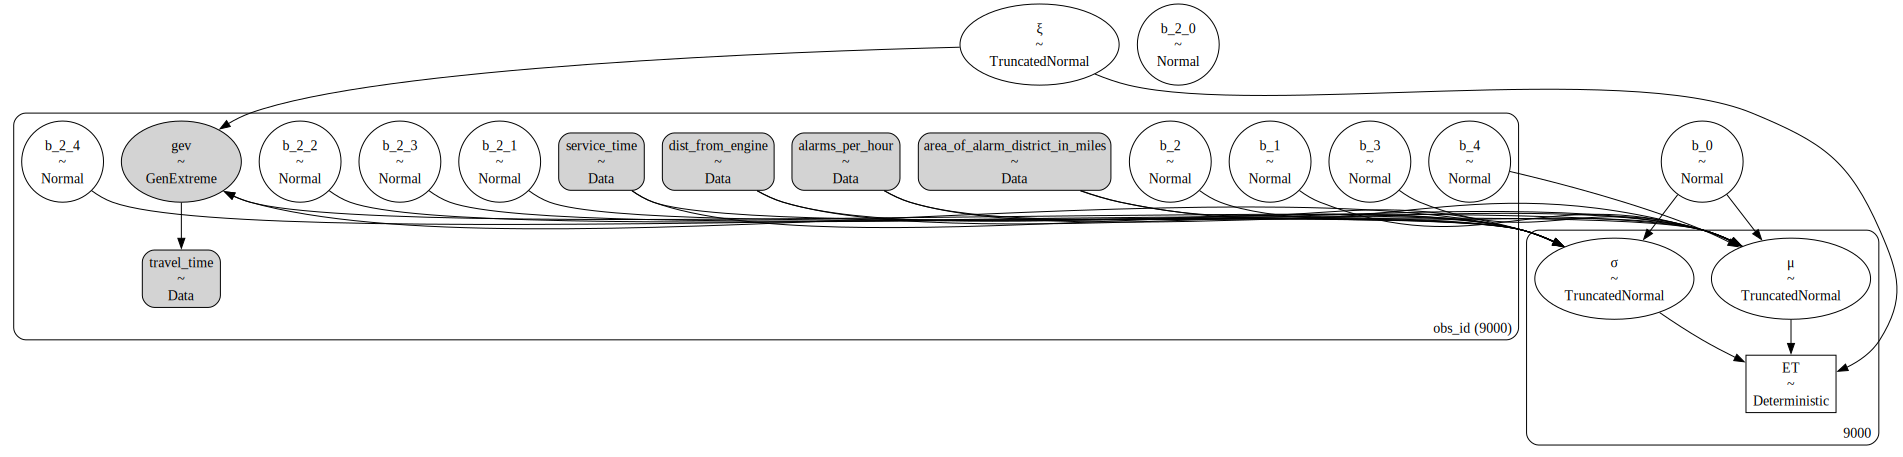

In [87]:
#https://www.pymc.io/projects/examples/en/latest/case_studies/GEV.html
# Optionally centre the data, depending on fitting and divergences
# cdata = (data - data.mean())/data.std()
#(-0.08169165903243036, 2.9288047916457476, 1.336149806198795)

with pm.Model(coords=coords) as simple_gev_model:
    #data
    tt = pm.Data('travel_time', travel_time, dims='obs_id')
    ar = pm.Data('area_of_alarm_district_in_miles', area_of_alarm_district_in_miles, dims='obs_id')
    st = pm.Data('service_time', service_time, dims='obs_id')
    de = pm.Data('dist_from_engine', dist_from_engine, dims='obs_id')
    al = pm.Data('alarms_per_hour', alarms_per_hour, dims='obs_id')

    #hyperpriors
 
    b_0 = pm.Normal('b_0',0,1)
    b_1 = pm.Normal('b_1',0,10, dims='obs_id')
    b_2 = pm.Normal('b_2',0,10, dims='obs_id')
    b_3 = pm.Normal('b_3',0,10, dims='obs_id')
    b_4 = pm.Normal('b_4',0,10, dims='obs_id')   

    X_1 = b_0 + b_1*pt.transpose(ar) + b_2*pt.transpose(st)+ b_3*pt.transpose(de)+ b_4*pt.transpose(al)

    b_2_0 = pm.Normal('b_2_0',0,1)
    b_2_1 = pm.Normal('b_2_1',0,10, dims='obs_id')
    b_2_2 = pm.Normal('b_2_2',0,10, dims='obs_id')
    b_2_3 = pm.Normal('b_2_3',0,10, dims='obs_id')
    b_2_4 = pm.Normal('b_2_4',0,10, dims='obs_id') 

    X_2 = b_0 + b_2_1*pt.transpose(ar) + b_2_2*pt.transpose(st)+ b_2_3*pt.transpose(de)+ b_2_4*pt.transpose(al)   

    # Priors
    μ = pm.TruncatedNormal("μ", mu=X_1, sigma=5, lower=.0001)  #Location
    σ = pm.TruncatedNormal("σ", mu=X_2, sigma=5, lower=.0001)  #shape
    ξ = pm.TruncatedNormal("ξ", mu=0, sigma=.1, lower=.0001, upper=1)
    # Estimation
    gev = pmx.GenExtreme('gev', mu=μ, sigma=σ, xi=ξ, observed=tt, dims='obs_id') #incident_data
    g_1 = pt.gamma(1-ξ)
    ET = pm.Deterministic('ET', μ + (σ*(g_1 - 1))/ξ)
pm.model_to_graphviz(simple_gev_model)

In [89]:
with simple_gev_model:
    sgm_prior = pm.sample_prior_predictive(100)

Sampling: [b_0, b_1, b_2, b_2_0, b_2_1, b_2_2, b_2_3, b_2_4, b_3, b_4, gev, μ, ξ, σ]


<Axes: xlabel='gev'>

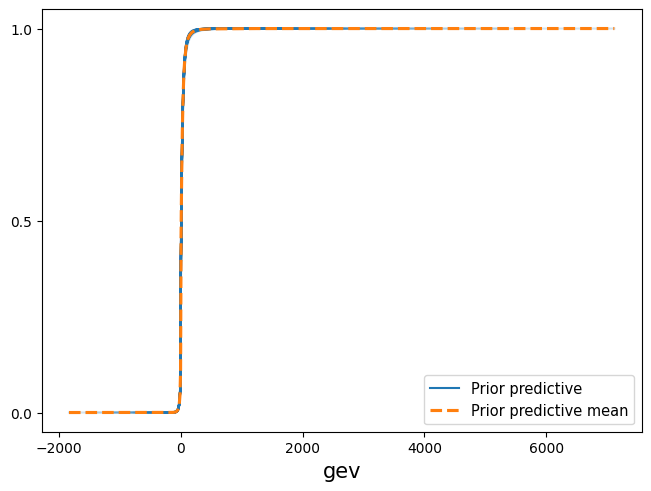

In [90]:
az.plot_ppc(sgm_prior, group='prior', kind='cumulative')

In [77]:
import seaborn.objects as so

In [103]:
(sgm_prior.prior['ET'].sel(chain=[0], draw=[0]).squeeze()).values

array([ 6.9699707, 56.106342 ,  3.0040183, ..., 31.957775 ,  6.894813 ,
        0.8243568], dtype=float32)

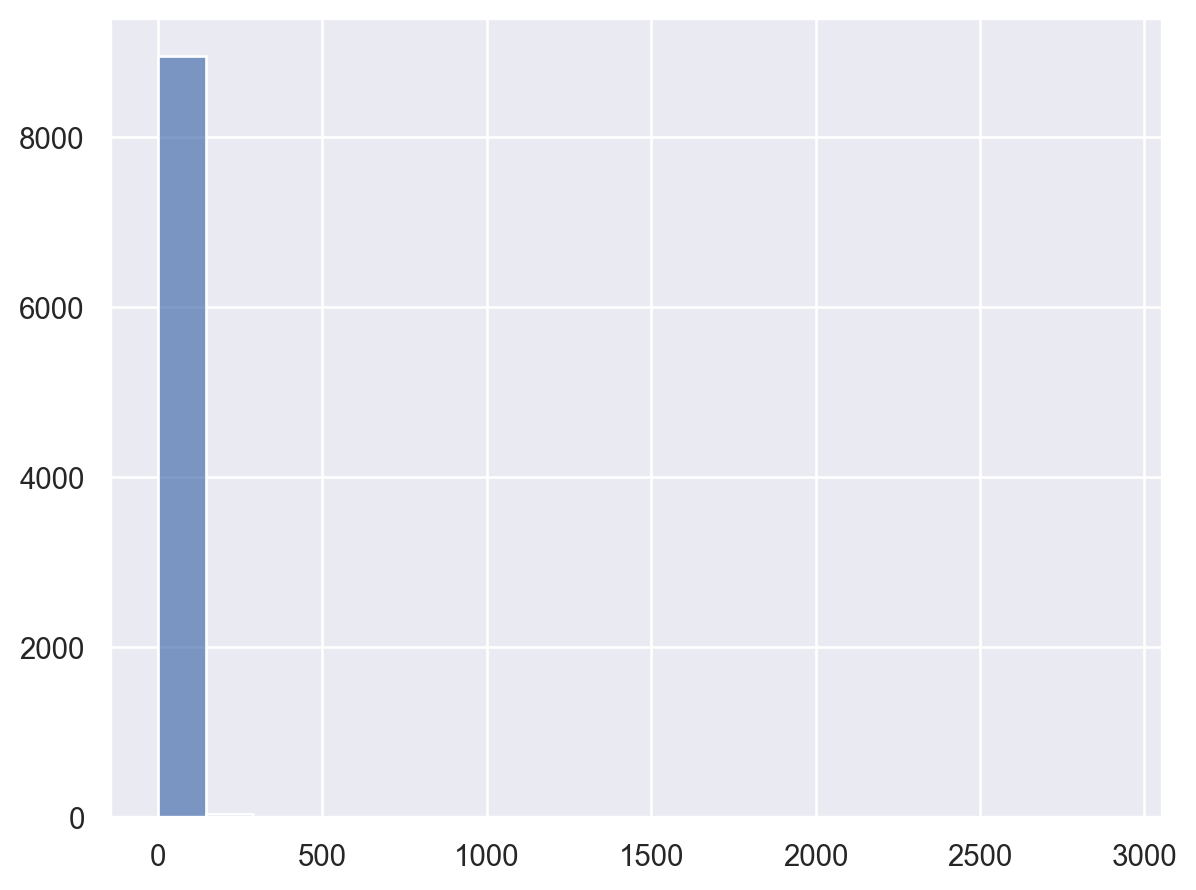

In [104]:
#so.Plot(sgm_prior.prior['ET'].sel(chain=[0], draw=[0]).squeeze()).add(so.Bars(), so.Hist(bins=20))
so.Plot((sgm_prior.prior['ET'].sel(chain=[0], draw=[0]).squeeze()).values).add(so.Bars(), so.Hist(bins=20))

In [124]:
engine

Index(['E-01', 'E-02', 'E-03', 'E-04', 'E-05', 'E-06', 'E-07', 'E-08', 'E-09',
       'E-10', 'E-11', 'E-12', 'E-13', 'E-14', 'E-15', 'E-16', 'E-17', 'E-18',
       'E-19', 'E-20', 'E-21', 'E-22', 'E-23', 'E-24', 'E-25', 'E-26', 'E-27',
       'E-28', 'E-29', 'E-30', 'E-31', 'E-32', 'E-33'],
      dtype='object')

In [149]:
with gp_model:
    print(engines.shape.eval())

[9000]


In [153]:
gp_model.dim_lengths

{'cov_params': cov_params, 'engine': engine, 'obs_id': obs_id, 'X': X}

In [151]:
gp_model.eval_rv_shapes()


{'ℓ_log__': (),
 'ℓ': (),
 'η_log__': (3,),
 'η': (3,),
 'μ_group': (),
 'μ_gp_rotated_': (9000,),
 'σ_log_rotated_': (33,),
 'σ_log_group': (),
 'ξ_group_interval__': (),
 'ξ_group': (),
 'ξ_gp_rotated_': (9000,)}

In [156]:
with gp_model:
    print(σ.shape.eval())

[9000]


In [137]:
travel_time

array([4., 1., 7., ..., 2., 5., 4.])

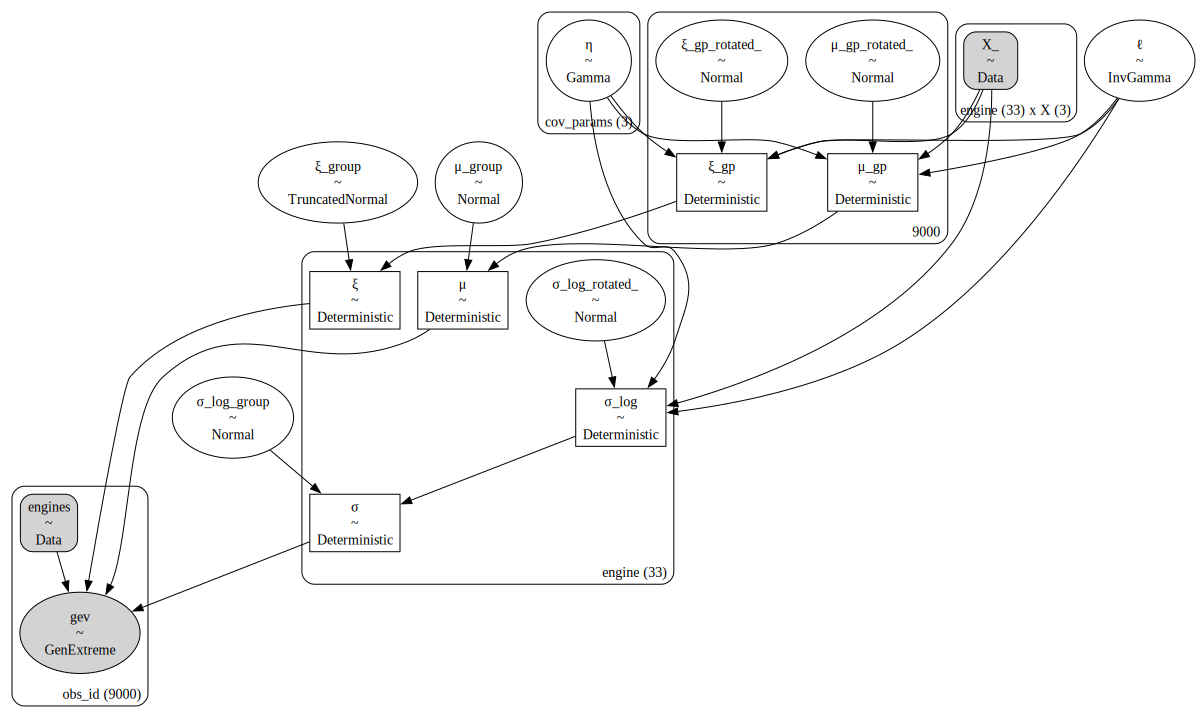

In [144]:
coords = {
    'cov_params': ['mu','sigma','xi'],
    'engine': engine,
    'obs_id': np.arange(model_data.shape[0]),
    'X': ['alarms_per_hour','service_time','area_of_alarm_district_in_miles']
}

X_gev = model_data[['alarms_per_hour','service_time','area_of_alarm_district_in_miles']].to_numpy()

with pm.Model(coords=coords) as gp_model:
    engines = pm.Data('engines', engine_idx, dims='obs_id') #W:factorized stations
    X = pm.Data('X_', X_gev, dims=('engine','X')) #W: lats and lons

    # gaussian process hyper parameters
    ℓ = pm.InverseGamma("ℓ", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    η = pm.Gamma("η", mu=0.15, sigma=0.10, dims = "cov_params") #W: for all covariance matrices 

    # gaussian process prior for mu
    gp_μ = pm.gp.Latent(cov_func=η[0]*pm.gp.cov.ExpQuad(3,ℓ))
    μ_group = pm.Normal("μ_group", mu=3.0, sigma=1.0) 
    μ = pm.Deterministic("μ", μ_group + gp_μ.prior("μ_gp", X=X), dims='engine') 

    # gaussian process prior for sigma
    gp_σ_log = pm.gp.Latent(cov_func=η[1]*pm.gp.cov.ExpQuad(3,ℓ))
    σ_log = gp_σ_log.prior("σ_log", X=X, dims='engine')
    σ_log_group = pm.Normal("σ_log_group", mu=-1.0, sigma=2.0)
    σ = pm.Deterministic("σ", pm.math.exp(σ_log_group + σ_log),dims='engine')
    
    # gaussian process prior for xi
    gp_ξ = pm.gp.Latent(cov_func=η[2]*pm.gp.cov.ExpQuad(3,ℓ))
    ξ_group =  pm.TruncatedNormal('ξ_group', mu=0.0, sigma=0.25, lower=-0.99, upper=0.99)
    ξ = pm.Deterministic("ξ", pm.math.tanh(ξ_group + gp_ξ.prior("ξ_gp", X=X)), dims='engine') #W: keep this func
    
    # likelihood for all observations
    gev = pmx.GenExtreme("gev", mu=μ[engines], sigma=σ[engines], xi=ξ[engines], observed=travel_time, dims='obs_id')
   
    # mcmc sampling
    #gp_trace = pm.sample(1000, target_accept = 0.98, random_seed=314)

pm.model_to_graphviz(gp_model)


In [187]:
#np.linspace(0, 10, 100)#[:, None]
area_of_alarm_district_in_miles.reshape(-1,1)

array([[1.00311406],
       [3.24700276],
       [4.8517733 ],
       ...,
       [0.52442985],
       [1.34631185],
       [3.24700276]])

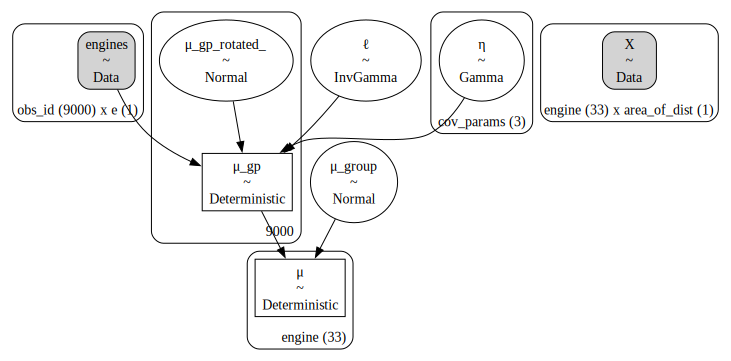

In [ ]:
oi = np.arange(model_data.shape[0]).reshape(-1,1)
aa = area_of_alarm_district_in_miles.reshape(-1,1)
e_idx = engine_idx.reshape(-1,1)
e = engine.to_numpy().reshape(-1,1)
coords = {
    'cov_params': ['mu','sigma','xi'],
    'engine': e,
    'obs_id': oi,
    'area_of_dist':[1]
}

#X_gev = model_data[['alarms_per_hour','service_time','area_of_alarm_district_in_miles']].to_numpy()

with pm.Model(coords=coords) as gp_model_s:
    engines = pm.Data('engines', e_idx, dims=('obs_id','e')) #W:factorized stations
    X = pm.Data('X', aa, dims=('engine','area_of_dist')) #W: lats and lons

    # gaussian process hyper parameters
    ℓ_1 = pm.InverseGamma("ℓ_1", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    ℓ_2 = pm.InverseGamma("ℓ_2", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    ℓ_3 = pm.InverseGamma("ℓ_3", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    η = pm.Gamma("η", mu=0.15, sigma=0.10, dims = "cov_params") #W: for all covariance matrices 

    # gaussian process prior for mu
    gp_μ_ = pm.gp.Latent(cov_func=η[0]*pm.gp.cov.ExpQuad(1,ℓ))
    μ_group = pm.Normal("μ_group", mu=3.0, sigma=1.0) 
    μ = pm.Deterministic("μ", μ_group + gp_μ.prior("μ_gp", X=engines), dims='engine') 
    '''
    # gaussian process prior for sigma
    gp_σ_log = pm.gp.Latent(cov_func=η[1]*pm.gp.cov.ExpQuad(3,ℓ))
    σ_log = gp_σ_log.prior("σ_log", X=X, dims='engine')
    σ_log_group = pm.Normal("σ_log_group", mu=-1.0, sigma=2.0)
    σ = pm.Deterministic("σ", pm.math.exp(σ_log_group + σ_log),dims='engine')
    
    # gaussian process prior for xi
    gp_ξ = pm.gp.Latent(cov_func=η[2]*pm.gp.cov.ExpQuad(3,ℓ))
    ξ_group =  pm.TruncatedNormal('ξ_group', mu=0.0, sigma=0.25, lower=-0.99, upper=0.99)
    ξ = pm.Deterministic("ξ", pm.math.tanh(ξ_group + gp_ξ.prior("ξ_gp", X=X)), dims='engine') #W: keep this func
    '''
    # likelihood for all observations
    #gev = pmx.GenExtreme("gev", mu=μ[engines], sigma=σ[engines], xi=ξ[engines], observed=travel_time, dims='obs_id')
   
    # mcmc sampling
    #gp_trace = pm.sample(1000, target_accept = 0.98, random_seed=314)

pm.model_to_graphviz(gp_model_s)


In [225]:
engine.to_numpy().reshape(-1,1).shape

(33, 1)

In [161]:
with gp_model_k:
    print(gev.shape.eval())

[9000]


In [242]:
#now with Kron
oi = np.arange(model_data.shape[0]).reshape(-1,1)
aa = area_of_alarm_district_in_miles.reshape(-1,1)
e_idx = engine_idx.reshape(-1,1)
e = engine.to_numpy().reshape(-1,1)
coords_k = {
    'cov_params': ['mu','sigma','xi'],
    'engine': e,
    'obs_id': oi,
    'area_of_dist':[1],
    'X': ['alarms_per_hour','service_time','area_of_alarm_district_in_miles']
}


X_gev = model_data[['alarms_per_hour','service_time','area_of_alarm_district_in_miles']].to_numpy().reshape(-1,3)
#Xs = [alarms_per_hour, service_time, area_of_alarm_district_in_miles]

with pm.Model(coords=coords_k) as gp_model_k:
    engines = pm.Data('engines', e_idx, dims=('obs_id','e')) #W:factorized stations
    X = pm.Data('X_', X_gev, dims=('engine','X')) #W: lats and lons

    # gaussian process hyper parameters
    ℓ_1 = pm.InverseGamma("ℓ_1", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    ℓ_2 = pm.InverseGamma("ℓ_2", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    ℓ_3 = pm.InverseGamma("ℓ_3", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    η = pm.Gamma("η", mu=0.15, sigma=0.10, dims='cov_params') #W: for all covariance matrices 

    #cov f
    cov_μ_1 = η*pm.gp.cov.ExpQuad(1, ℓ_1)
    cov_μ_2 = η*pm.gp.cov.ExpQuad(1, ℓ_2)
    cov_μ_3 = η*pm.gp.cov.ExpQuad(1, ℓ_3)

    # gaussian process prior for mu
    gp_μ = pm.gp.LatentKron(cov_funcs=[cov_μ_1, cov_μ_2, cov_μ_3])
    μ_group = pm.Normal("μ_group", mu=3.0, sigma=1.0) 
    μ = pm.Deterministic("μ", μ_group + gp_μ.prior("μ_gp", Xs=Xs)) 
    '''
    # gaussian process prior for sigma
    gp_σ_log = pm.gp.Latent(cov_func=η[1]*pm.gp.cov.ExpQuad(3,ℓ))
    σ_log = gp_σ_log.prior("σ_log", X=X, dims='engine')
    σ_log_group = pm.Normal("σ_log_group", mu=-1.0, sigma=2.0)
    σ = pm.Deterministic("σ", pm.math.exp(σ_log_group + σ_log),dims='engine')
    
    # gaussian process prior for xi
    gp_ξ = pm.gp.Latent(cov_func=η[2]*pm.gp.cov.ExpQuad(3,ℓ))
    ξ_group =  pm.TruncatedNormal('ξ_group', mu=0.0, sigma=0.25, lower=-0.99, upper=0.99)
    ξ = pm.Deterministic("ξ", pm.math.tanh(ξ_group + gp_ξ.prior("ξ_gp", X=X)), dims='engine') #W: keep this func
    '''
    # likelihood for all observations
    #gev = pmx.GenExtreme("gev", mu=μ[engines], sigma=1, xi=1, observed=travel_time, dims='obs_id')
   
    # mcmc sampling
    #gp_trace = pm.sample(1000, target_accept = 0.98, random_seed=314)

pm.model_to_graphviz(gp_model_k)


MemoryError: Unable to allocate 2.65 TiB for an array with shape (9000, 9000, 9000) and data type int32

In [145]:
with gp_model:
    #gp_prior = pm.sample_prior_predictive(100)
    gp_trace = pm.sample(1000, target_accept = 0.98, random_seed=314)
    #print(X.shape.eval())

Initializing NUTS using jitter+adapt_diag...


ValueError: Incompatible Elemwise input shapes [(9000, 9000), (33, 33)]

In [120]:
gp_model.debug(verbose=True)

point={'ℓ_log__': array(3.912023, dtype=float32), 'η_log__': array([-1.89712, -1.89712, -1.89712], dtype=float32), 'μ_group': array(3., dtype=float32), 'μ_gp_rotated_': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'σ_log_rotated_': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), 'σ_log_group': array(-1., dtype=float32), 'ξ_group_interval__': array(0., dtype=float32), 'ξ_gp_rotated_': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}



KeyboardInterrupt: 

In [ ]:
station_idx, stations = prcp_annual_max_.reset_index()['id'].factorize(sort=False)

y_ = prcp_annual_max_.to_numpy()
X_lonlat = nyc_region_stations_info.loc[stations][['longitude','latitude']].to_numpy()

coords = {
    "cov_params": ["mu","sigma","xi"],#W: means from the coviariance matrecies
    "location" : ["x","y"],
    "lonlat" : ["longitude", "latitude"],
    "station" : stations,
    "obs" : prcp_annual_max_.reset_index().index,
    "rp" : return_periods,
}

with pm.Model(coords=coords) as gp_model:
    pt_idx = pm.ConstantData("station_idx", station_idx, dims="obs") #W:factorized stations
    pt_X_lonlat = pm.ConstantData("station_loc", X_lonlat, dims=("station","lonlat")) #W: lats and lons

    # gaussian process hyper parameters
    ℓ = pm.InverseGamma("ℓ", mu = 50.0, sigma = 50.0) #W: for all covariance matrices
    η = pm.Gamma("η", mu=0.15, sigma=0.10, dims = "cov_params") #W: for all covariance matrices 

    # gaussian process prior for mu
    gp_μ = pm.gp.Latent(cov_func=η[0]**2 * Matern32Chordal(2, ℓ))
    μ_group = pm.Normal("μ_group", mu=3.0, sigma=1.0) 
    μ = pm.Deterministic("μ", μ_group + gp_μ.prior("μ_gp", X=pt_X_lonlat), dims="station") 

    # gaussian process prior for sigma
    gp_σ_log = pm.gp.Latent(cov_func=η[1]**2 * Matern32Chordal(2, ℓ))
    σ_log = gp_σ_log.prior("σ_log", X=pt_X_lonlat, dims="station")
    σ_log_group = pm.Normal("σ_log_group", mu=-1.0, sigma=2.0)
    σ = pm.Deterministic("σ", pm.math.exp(σ_log_group + σ_log),dims="station")
    # gaussian process prior for xi
    gp_ξ = pm.gp.Latent(cov_func=η[2]**2 * Matern32Chordal(2, ℓ))
    ξ_group =  pm.TruncatedNormal('ξ_group', mu=0.0, sigma=0.25, lower=-0.99, upper=0.99)
    ξ = pm.Deterministic("ξ", pm.math.tanh(ξ_group + gp_ξ.prior("ξ_gp", X=pt_X_lonlat)), dims="station") #W: keep this func
    
    # likelihood for all observations
    gev = pmx.GenExtreme("gev", mu=μ[pt_idx], sigma=σ[pt_idx], xi=ξ[pt_idx], observed=y_, dims="obs")
    # return levels
    rl = pm.Deterministic("rl",
        μ[:,None] - σ[:,None] / ξ[:,None] * (1 - (-np.log(1 - p[None:,])) ** (-ξ[:,None])),
        dims=('station','rp')
    )
    # mcmc sampling
    gp_trace = pm.sample(1000, target_accept = 0.98, random_seed=314)

# pm.model_to_graphviz(gp_model)

In [105]:
with simple_gev_model:
    sgm_trace = pm.sample(draws=1000, tune=1000, chains=4, nuts_sampler='nutpie')

c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x00000214F8F19B20>
Traceback (most recent call last):
  File "c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\llvmlite\binding\executionengine.py", line 178, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):

KeyboardInterrupt: 


Progress,Draws,Divergences,Step Size,Gradients/Draw
,0,0,0.00,0
,0,0,0.00,0
,0,0,0.00,0
,0,0,0.00,0


RuntimeError: All initialization points failed

Caused by:
    Logp function returned error: Logp function returned error code 4

array([[<Axes: title={'center': 'μ_log__'}>,
        <Axes: title={'center': 'μ_log__'}>],
       [<Axes: title={'center': 'σ_log__'}>,
        <Axes: title={'center': 'σ_log__'}>],
       [<Axes: title={'center': 'ξ_interval__'}>,
        <Axes: title={'center': 'ξ_interval__'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'ξ'}>, <Axes: title={'center': 'ξ'}>],
       [<Axes: title={'center': 'ET'}>, <Axes: title={'center': 'ET'}>]],
      dtype=object)

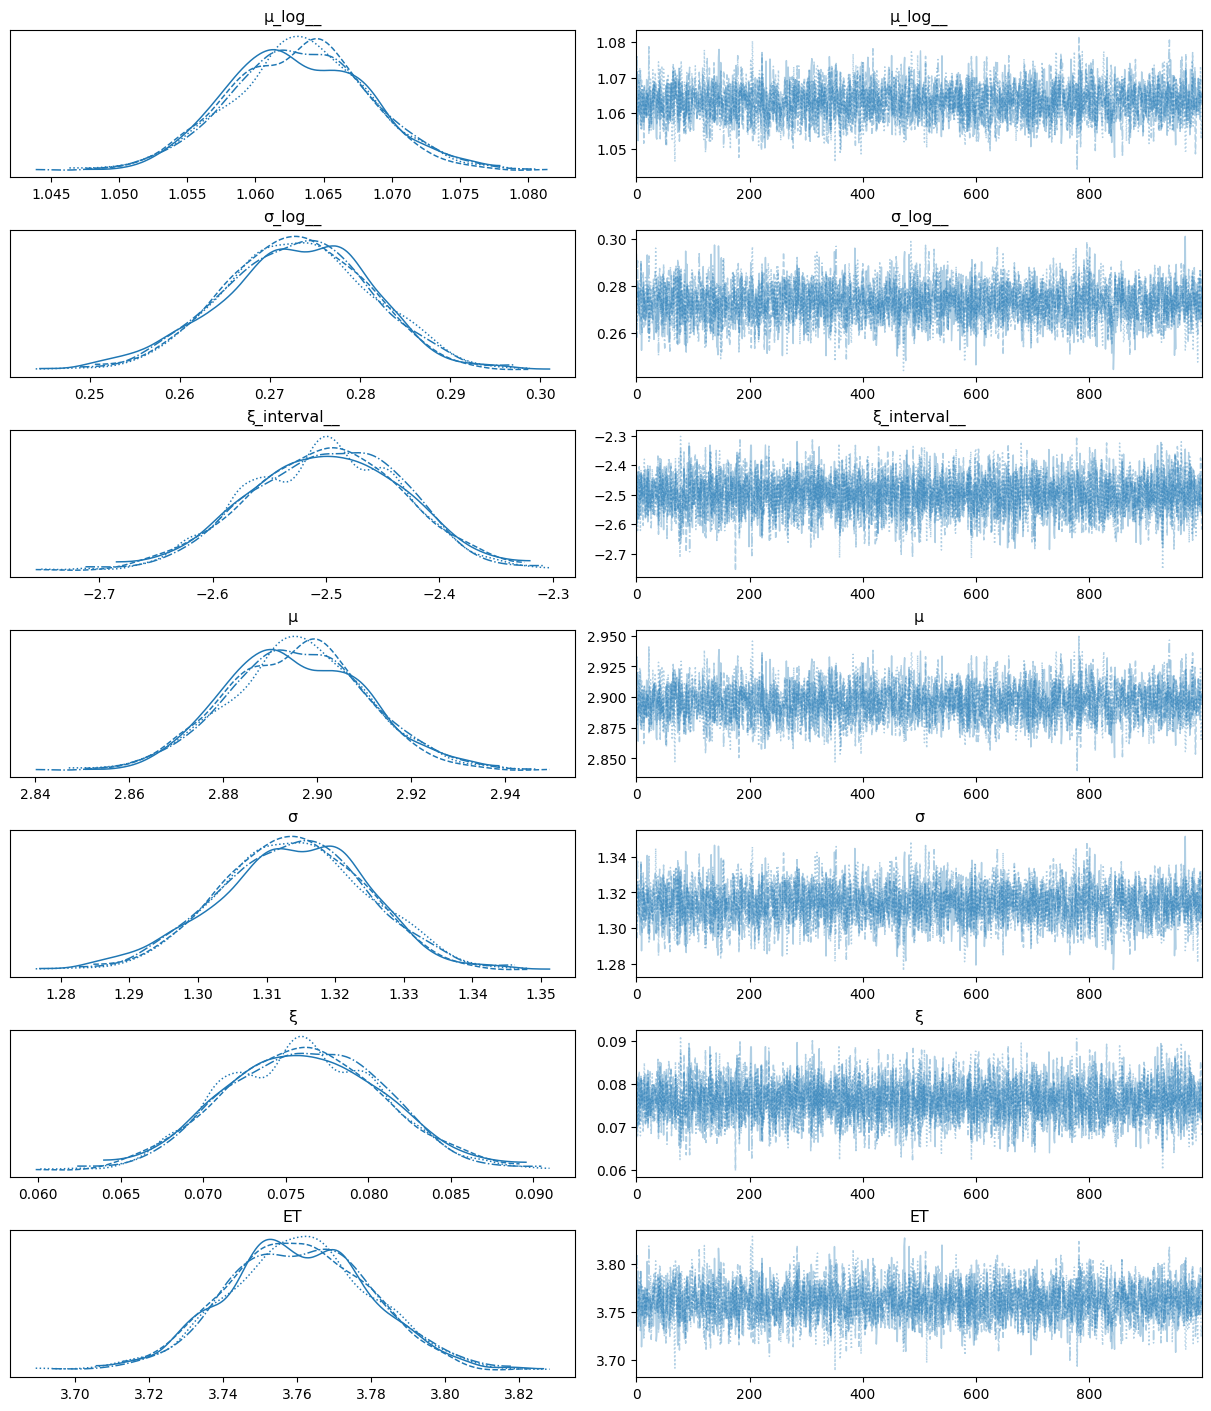

In [85]:
az.plot_trace(sgm_trace, var_names= ['μ', 'ξ', 'σ'])

In [86]:
az.summary(sgm_trace, var_names= ['μ', 'ξ', 'σ'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ_log__,1.063,0.005,1.054,1.073,0.000,0.000,3646.0,3026.0,1.0
σ_log__,0.273,0.008,0.258,0.288,0.000,0.000,3548.0,2939.0,1.0
ξ_interval__,-2.500,0.068,-2.629,-2.379,0.001,0.001,5704.0,3499.0,1.0
μ,2.896,0.015,2.868,2.923,0.000,0.000,3646.0,3026.0,1.0
σ,1.314,0.011,1.294,1.334,0.000,0.000,3548.0,2939.0,1.0
ξ,0.076,0.005,0.067,0.085,0.000,0.000,5704.0,3499.0,1.0
ET,3.760,0.019,3.726,3.798,0.000,0.000,3663.0,3030.0,1.0


In [ ]:
az.summary(sgm_trace)

In [ ]:
cdf_sgm = 
h_sgm = pdf/(1-cdf)

In [77]:
import seaborn.objects as so

In [82]:
sgm_prior.prior['ET'].sel(chain=[0]).squeeze()

<xarray.DataArray 'ET' (draw: 1000)> Size: 4kB
array([ 8.771131  ,  5.7301435 ,  9.484942  ,  5.416924  ,  6.197258  ,
        5.0486946 ,  8.398843  ,  8.385096  ,  4.030916  ,  9.295125  ,
        7.354466  ,  0.6469269 ,  3.9290576 ,  5.1232543 , 10.274794  ,
       16.749012  , 12.923851  , 10.267078  ,  6.278784  ,  2.6933036 ,
        4.273647  ,  4.9001517 ,  8.833473  ,  2.470705  ,  1.3032485 ,
        1.7805526 ,  6.9006577 ,  7.9898844 ,  9.642948  ,  5.7850666 ,
        5.111199  ,  7.337649  ,  7.18632   ,  5.4738684 ,  3.8246381 ,
       11.953895  ,  1.3844595 ,  2.0438151 ,  2.2295544 ,  7.8300657 ,
       12.858906  ,  0.40393957, 10.302368  ,  2.8811202 ,  5.0585012 ,
        3.4980032 ,  7.729115  ,  5.2438803 ,  7.8437443 ,  9.529766  ,
        4.9108224 ,  5.096916  ,  9.292475  ,  6.575409  ,  1.0750002 ,
       10.179516  ,  3.0555987 ,  2.7343974 ,  5.928798  ,  5.6149583 ,
        3.8244188 , 11.346074  , 15.3992605 ,  6.7888045 ,  3.031897  ,
        8.841497  ,  9.585673  ,  4.1555104 ,  4.9439225 ,  9.623636  ,
       10.2529335 ,  4.1738133 ,  9.908271  ,  5.4736786 ,  8.446909  ,
       13.409845  ,  7.8513713 ,  4.8996773 ,  5.684147  ,  4.5146365 ,
        0.46110305,  7.34461   ,  3.4243383 , 24.31535   ,  4.332486  ,
        9.314675  ,  5.3329587 ,  4.8973894 ,  3.474447  ,  8.796541  ,
        3.6226964 ,  2.0120938 ,  1.871437  ,  0.4893217 , 10.407493  ,
        8.565925  ,  1.4455636 ,  5.3434367 , 17.321667  ,  7.2621307 ,
...
        9.370182  ,  6.9018183 , 14.510206  ,  8.878844  , 15.9820795 ,
        1.9604857 ,  8.275152  ,  6.7376537 ,  6.174357  ,  5.2527795 ,
        6.8585873 ,  4.1378818 ,  3.1777442 ,  3.4288056 ,  0.45265955,
        5.8151097 , 11.311245  ,  5.6031675 , 10.467443  ,  2.0517845 ,
       10.55039   ,  3.0569758 ,  0.9420381 ,  2.2858658 ,  6.808709  ,
        3.4554029 ,  5.8461556 ,  3.6507    , 12.525379  ,  5.61631   ,
       10.618084  ,  6.0836563 ,  5.818445  ,  3.5164912 ,  5.520663  ,
        6.7946887 , 11.246266  ,  3.7989159 ,  0.90595484,  5.367623  ,
        5.5892844 ,  8.373034  ,  7.805178  ,  7.1589217 ,  2.8363636 ,
        3.1381888 ,  8.864639  ,  8.135822  ,  5.29195   ,  2.2175455 ,
        7.49136   ,  8.208963  , 13.171018  ,  5.520813  ,  7.401921  ,
        6.862611  ,  7.5073214 ,  6.329043  ,  1.9753839 ,  2.0209758 ,
        8.352761  ,  3.531219  ,  3.1492138 ,  4.4672537 ,  7.281253  ,
        0.60476756,  4.0403957 ,  6.484068  ,  5.303173  ,  5.068239  ,
        7.941918  ,  8.344939  ,  5.026697  ,  3.074945  ,  1.9143116 ,
       11.308734  , 13.739035  ,  5.5930967 ,  3.178956  ,  2.603041  ,
       12.358818  ,  6.1831126 ,  5.148881  ,  8.732405  ,  7.1153345 ,
        5.488095  ,  5.077511  , 11.377638  ,  2.140126  , 12.830256  ,
        4.7540197 ,  1.8078882 ,  6.103854  ,  1.4104296 , 10.470182  ],
      dtype=float32)
Coordinates:
    chain    int32 4B 0
  * draw     (draw) int32 4kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [120]:
so.Plot(idata_prior.prior['ET'].sel(chain=[0], draw=[0]).squeeze()).add(so.Bars(), so.Hist(bins=20))

TypeError: len() of unsized object

<Axes: xlabel='gev'>

c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


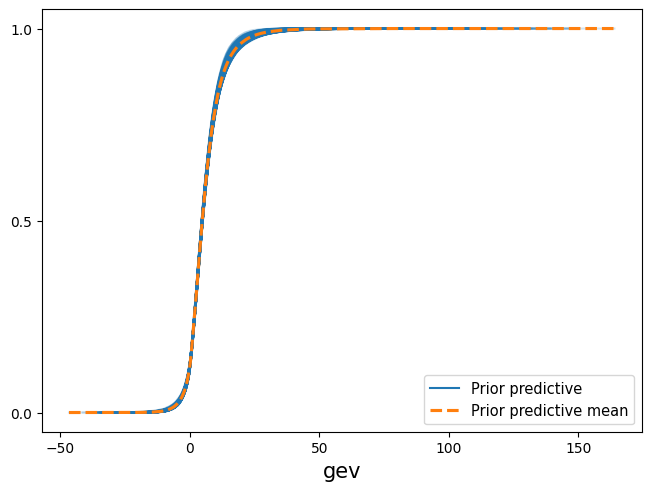

In [83]:
az.plot_ppc(idata_prior, group='prior', kind='cumulative')

In [85]:
with simple_gev_model:
    trace = pm.sample(draws=1000, tune=1000, chains=4, nuts_sampler='nutpie')

c:\Users\gargo\AppData\Local\pdm\pdm\venvs\Python313-hjN0PIbs-pymc2\.venv\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(


Progress,Draws,Divergences,Step Size,Gradients/Draw
,0,0,0.00,0
,0,0,0.00,0
,0,0,0.00,0
,0,0,0.00,0


RuntimeError: All initialization points failed

Caused by:
    Logp function returned error: Logp function returned error code 4

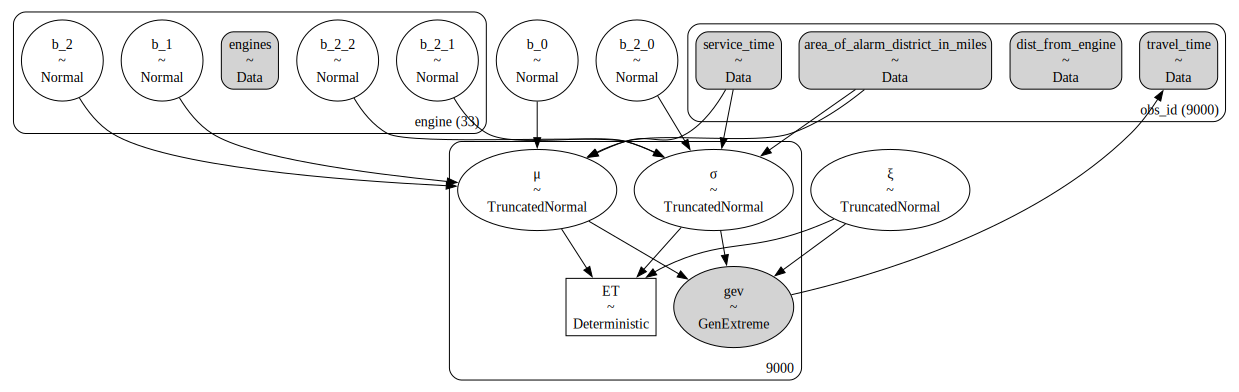

In [ ]:
#https://www.pymc.io/projects/examples/en/latest/case_studies/GEV.html
# Optionally centre the data, depending on fitting and divergences
# cdata = (data - data.mean())/data.std()
#(-0.08169165903243036, 2.9288047916457476, 1.336149806198795)

with pm.Model(coords=coords) as pooled_gev_model:
    tt = pm.Data('travel_time', travel_time, dims='obs_id')
    en = pm.Data('engines', engine_idx, dims='engine')
    #alarms = pm.Data('alarms_per_hour', alarms_per_hour, dims='obs_id')
    de = pm.Data('dist_from_engine', dist_from_engine, dims='obs_id')
    st = pm.Data('service_time', service_time, dims='obs_id')
    a = pm.Data('area_of_alarm_district_in_miles', area_of_alarm_district_in_miles, dims='obs_id')

    b_0 = pm.Normal('b_0',0,1)
    b_1 = pm.Normal('b_1',0,1, dims='engine')
    b_2 = pm.Normal('b_2',0,1, dims='engine')

    X_1 = b_0 + b_1[engine_idx]*pt.transpose(a) + b_2[engine_idx]*pt.transpose(st)

    b_2_0 = pm.Normal('b_2_0',0,1)
    b_2_1 = pm.Normal('b_2_1',0,1, dims='engine')
    b_2_2 = pm.Normal('b_2_2',0,1, dims='engine')

    X_2 = b_2_0 + b_2_1[engine_idx]*pt.transpose(a) + b_2_2[engine_idx]*pt.transpose(st)

    #hyperpriors
    #mu_h = pm.Exponential('mu_h', lam=.3)
    #a_h = pm.Exponential('a_h', lam=2)

    # Priors
    μ = pm.TruncatedNormal("μ", mu=X_1, sigma=1, lower=.1, upper=20)  #Location
    σ = pm.TruncatedNormal("σ", mu=X_2, sigma=1, lower=.1, upper=20)  #shape
    ξ = pm.TruncatedNormal("ξ", mu=0, sigma=.1, lower=-1, upper=-.0001)
    # Estimation
    gev = pmx.GenExtreme('gev', mu=μ, sigma=σ, xi=ξ, observed=tt) #incident_data
    g_1 = pt.gamma(1-ξ)
    ET = pm.Deterministic('ET', μ + (σ*(g_1 - 1))/ξ)
pm.model_to_graphviz(pooled_gev_model)

In [ ]:
az.summary(idata_stationary)

array([[<Axes: title={'center': 'μ_log__'}>,
        <Axes: title={'center': 'μ_log__'}>],
       [<Axes: title={'center': 'σ_log__'}>,
        <Axes: title={'center': 'σ_log__'}>],
       [<Axes: title={'center': 'ξ_interval__'}>,
        <Axes: title={'center': 'ξ_interval__'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>],
       [<Axes: title={'center': 'ξ'}>, <Axes: title={'center': 'ξ'}>],
       [<Axes: title={'center': 'ET'}>, <Axes: title={'center': 'ET'}>]],
      dtype=object)

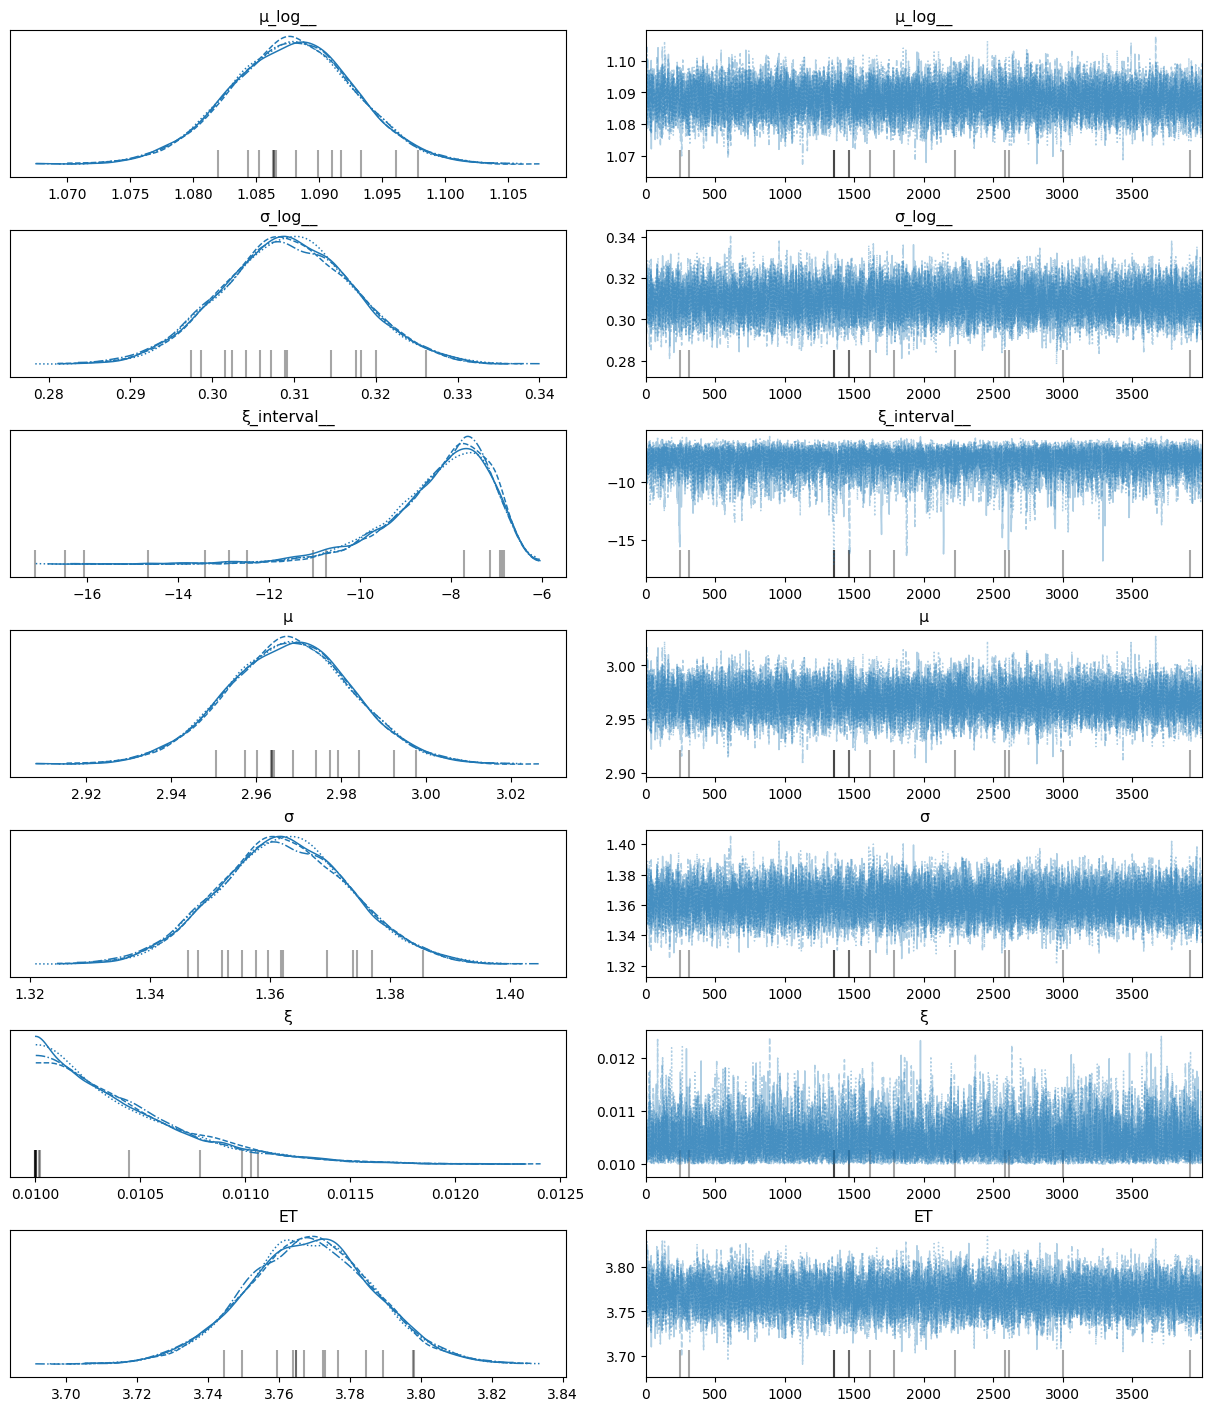

In [66]:
az.plot_trace(idata_stationary)

In [ ]:
with stationary_gev_model:
    idata_stationary_posterior = pm.sample_posterior_predictive(idata_test_2, var_names= ['gev'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
az.plot_ppc(idata_test_2, var_names= ['gev'], num_pp_samples=100, alpha=0.03, figsize=(12, 6))

In [ ]:
engine_zone_id = incident_data.ENGINE_ID.factorize() #encode the object as an enumerated type or categorical variable. (this should be fixed)
coords = {'Engine': engine_zone_id}

In [ ]:
#https://www.pymc.io/projects/examples/en/latest/case_studies/GEV.html
# Optionally centre the data, depending on fitting and divergences
# cdata = (data - data.mean())/data.std()
#(-0.08169165903243036, 2.9288047916457476, 1.336149806198795)

with pm.Model(coords=coords) as location_parameterisation_gev_model:
    # Priors
    μ = pm.HalfNormal("μ", sigma=5)  #Location
    σ = pm.HalfNormal("σ", sigma=5)  #scale
    ξ = pm.TruncatedNormal("ξ", mu=0, sigma=.001, lower=0.01, upper=1) #shape
    # Estimation
    gev = pmx.GenExtreme('gev', mu=μ, sigma=σ, xi=ξ, observed=incident_data['travel_time']) #incident_data
    g_1 = pt.gamma(1-ξ)
    ET = pm.Deterministic('ET', μ + (σ*(g_1 - 1))/ξ)
    idata_location = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')

In [ ]:
az.summary(idata_location)

In [ ]:
az.plot_trace(idata_location)

In [ ]:
with location_gev_mode:
    idata_location_posterior = pm.sample_posterior_predictive(idata_stationary, var_names= ['gev'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
#https://www.pymc.io/projects/examples/en/latest/case_studies/GEV.html
# Optionally centre the data, depending on fitting and divergences
# cdata = (data - data.mean())/data.std()
#(-0.08169165903243036, 2.9288047916457476, 1.336149806198795)

with pm.Model(coords=coords) as scale_and_location_gev_model:
    alarms_per_hour = pm.MutableData('alarms_per_hour', floor_measure, dims='obs_id') #FIX THIS (Should this be within the area for city wide?)
    #engine_zone_area = pm.MutableData('engine_zone_area', county, dims="obs_id") #FIX THIS (this conflates with engine_id)
    engine_zone_id = pm.MutableData('engine_zone_id', county, dims='obs_id') #FIX THIS 
    service_time = pm.MutableData('service_time', county, dims='obs_id') #FIX THIS (Should this be within the area for city wide?)
    dist_from_engine = pm.MutableData('dist_from_engine', county, dims='obs_id') #FIX THIS (Not Sure about this)
    incidents = pm.MutableData('dist_from_engine', county, dims='obs_id') #FIX THIS (Not Sure about this)
    # Priors
    μ = pm.HalfNormal('μ', sigma=5, dims='Engine')  #Location
    σ = pm.HalfNormal('σ', sigma=5, dims='Engine')  #scale
    ξ = pm.TruncatedNormal('ξ', mu=0, sigma=.001, lower=0.01, upper=1) #shape

    β_0_μ = pm.Normal('β_0_μ',0, 100, dims='Engine')
    β_0_σ = pm.Normal('β_0_σ',0, 100, dims='Engine')
    
    # Model error
    ϵ_μ = pm.Normal('ϵ', 0,100, shape=(2,))
    ϵ_σ = pm.Normal('ϵ', 0,100, shape=(2,))

    #linking functions
    μ_hat = (β_0_μ[engine_zone_id] + μ[engine_zone_id]*incidents + ϵ[0]) >=0 #this should be μ*X
    σ_hat = (β_0_σ[engine_zone_id] + σ[engine_zone_id]*incidents + ϵ[1]) >=0 #this should be σ*X
    
    # Estimation
    gev = pmx.GenExtreme('gev', mu=μ_hat, sigma=σ_hat, xi=ξ, observed=incident_data['travel_time'], dims='obs_id') #incident_data
    g_1 = pt.gamma(1-ξ)
    ET = pm.Deterministic('ET', μ + (σ*(g_1 - 1))/ξ) #Expected Travel Time for DC
    idata_scale_and_location = pm.sample(draws=4000, chains=4, nuts_sampler='nutpie')

In [ ]:
az.summary(idata_scale_and_location)

In [ ]:
az.plot_trace(idata_scale_and_location) 

In [ ]:
with location_gev_mode:
    idata_scale_and_location_posterior = pm.sample_posterior_predictive(idata_stationary, var_names= ['gev'],
                                                         return_inferencedata=True,
                                                         extend_inferencedata=True,
                                                         predictions=False)

In [ ]:
with pm.Model(coords=coords) as varying_intercept_slope:
    floor_idx = pm.MutableData("floor_idx", floor_measure, dims="obs_id")
    county_idx = pm.MutableData("county_idx", county, dims="obs_id")

    # Priors
    mu_a = pm.Normal("mu_a", mu=0.0, sigma=10.0)
    sigma_a = pm.Exponential("sigma_a", 1)

    mu_b = pm.Normal("mu_b", mu=0.0, sigma=10.0)
    sigma_b = pm.Exponential("sigma_b", 1)

    # Random intercepts
    alpha = pm.Normal("alpha", mu=mu_a, sigma=sigma_a, dims="county")
    # Random slopes
    beta = pm.Normal("beta", mu=mu_b, sigma=sigma_b, dims="county")

    # Model error
    sigma_y = pm.Exponential("sigma_y", 1)

    # Expected value
    y_hat = alpha[county_idx] + beta[county_idx] * floor_idx

    # Data likelihood
    y_like = pm.Normal("y_like", mu=y_hat, sigma=sigma_y, observed=log_radon, dims="obs_id")

In [ ]:
#https://www.pymc.io/projects/examples/en/latest/survival_analysis/frailty_models.html#accelerated-failure-time-models
compare = az.compare({'stationary': idata_stationary, 'location': idata_location, 'scale_and_location':idata_scale_and_location}, ic='waic')
compare

In [ ]:
az.plot_compare(compare);

### Bibliography


The Generalized Extreme Value (GEV) distribution is a meta-distribution containing the Weibull, Gumbel, and Frechet families of extreme value distributions. It is used for modelling the distribution of extremes (maxima or minima) of stationary processes, such as the annual maximum wind speed, annual maximum truck weight on a bridge, and so on, without needing *a priori* decision on the tail behaviour.
    \n
    Following the parametrization used in {cite:t}`coles2001gev`, the GEV distribution for maxima is given by:\n
    \n
    $$
    G(x) = \exp \left\{ \left[ 1 - \xi \left( \frac{x - \mu}{\sigma} \right) \right]^{-\frac{1}{\xi}} \right\}
    $$\n
    \n
    when:\n
    - $\\xi < 0$ we get the Weibull distribution with a bounded upper tail
    - $$\\xi = 0$$, in the limit, we get the Gumbel distribution, unbonded in both tails;
    - $$\\xi > 0$$, we get the Frechet distribution which is bounded in the lower tail.
    \n
    Note that this parametrization of the shape parameter $\\xi$ is opposite in sign to that used in SciPy (where it is denoted `c`). Further, the distribution for minima is readily examined by studying the distribution of maxima of the negative of the data.\n
    \n

In [ ]:
%load_ext watermark
    
%watermark -n -u -v -iv -w 

In [135]:
from scipy.stats import genextreme

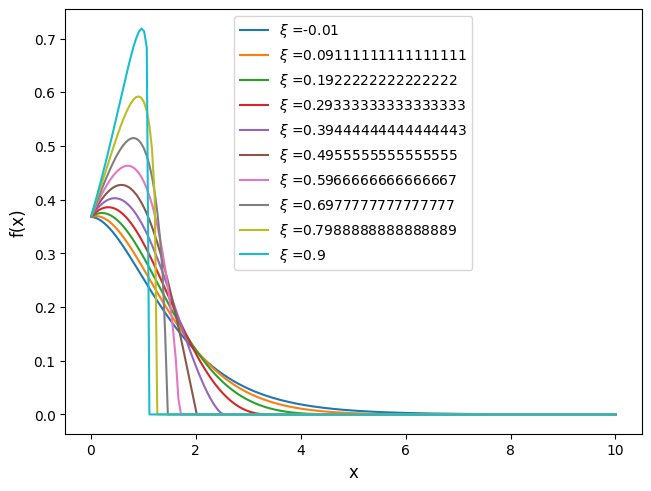

In [153]:
xi_t = np.linspace(-.01,.9, num=10)
x_t = np.linspace(0.01,10,200)
for xi in xi_t:
    pdf = genextreme.pdf(x_t,xi, 0,1)
    plt.plot(x_t,pdf, label=r'$\xi$ ={}'.format(xi))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
#plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()